### Question 1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import scipy.stats as stats

from statsmodels.tsa.stattools import acf
from scipy.stats import jarque_bera
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tools.sm_exceptions import ValueWarning
from statsmodels.stats.diagnostic import het_arch
from arch import arch_model
from arch.univariate import ZeroMean, ConstantMean
from statsmodels.stats.stattools import jarque_bera

from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.vector_ar.vecm import select_order

from statsmodels.tsa.vector_ar.vecm import VECM



Part a:

In [29]:
data = pd.read_csv('StockIndexFXDATA.csv')
data['DATE'] = pd.to_datetime(data['DATE'], format='%d/%m/%Y')
data.set_index('DATE', inplace=True)
data.head()

,YYYY,MM,DD,DAX30,DJ30,NIKKEI225,FTSE100,CAC40,EUROSTOXX50,SP500,SMI,VIX,USD_EUR,GBP_EUR,CHF_USD,USD_GBP
DATE,,,,,,,,,,,,,,,,
1990-01-02,1990,1,2,1814.38,2810.15,38915.87,2434.1,1988.85,1101.34,359.69,1778.1,17.24,1.27096,0.78844,1.5835,1.6120
1990-01-03,1990,1,3,1869.66,2809.73,38915.87,2463.7,1979.89,1112.82,358.76,1824.0,18.19,1.26248,0.78415,1.5795,1.6100
1990-01-04,1990,1,4,1835.88,2796.08,38712.88,2451.6,2006.42,1113.02,355.67,1824.5,19.22,1.28903,0.79082,1.5370,1.6300
1990-01-05,1990,1,5,1820.00,2773.25,38274.76,2444.5,1994.36,1099.52,352.20,1801.8,20.11,1.29054,0.78787,1.5390,1.6380
1990-01-08,1990,1,8,1843.24,2794.37,38294.96,2431.3,1968.95,1104.62,353.79,1800.3,20.26,1.29994,0.78618,1.5240,1.6535


In [30]:
indices = ['FTSE100', 'VIX']
data = data[indices]

In [31]:
def compute_returns(df, column):
    df[f'simple_returns_{column}'] = df[column] / df[column].shift(1) - 1
    df[f'log_returns_{column}'] = np.log(df[column] / df[column].shift(1))
    df[f'abs_log_returns_{column}'] = np.abs(df[f'log_returns_{column}'])
    df[f'squared_log_returns_{column}'] = df[f'log_returns_{column}'] ** 2
    std_dev = df[f'log_returns_{column}'].std()
    df[f'std_log_returns_{column}'] = df[f'log_returns_{column}'] / std_dev
    df_returns = df.dropna()
    return df_returns

for columns in indices:
    data = compute_returns(data, columns) 
    
data.head()

,FTSE100,VIX,simple_returns_FTSE100,log_returns_FTSE100,abs_log_returns_FTSE100,squared_log_returns_FTSE100,std_log_returns_FTSE100,simple_returns_VIX,log_returns_VIX,abs_log_returns_VIX,squared_log_returns_VIX,std_log_returns_VIX
DATE,,,,,,,,,,,,
1990-01-04,2451.6,19.22,-0.004911,-0.004923,0.004923,0.000024,-0.455496,0.056625,0.055079,0.055079,0.003034,0.836060
1990-01-05,2444.5,20.11,-0.002896,-0.002900,0.002900,0.000008,-0.268322,0.046306,0.045266,0.045266,0.002049,0.687098
1990-01-08,2431.3,20.26,-0.005400,-0.005415,0.005415,0.000029,-0.500930,0.007459,0.007431,0.007431,0.000055,0.112801
1990-01-09,2436.3,22.20,0.002057,0.002054,0.002054,0.000004,0.190065,0.095755,0.091444,0.091444,0.008362,1.388042
1990-01-10,2412.6,22.44,-0.009728,-0.009775,0.009775,0.000096,-0.904392,0.010811,0.010753,0.010753,0.000116,0.163219


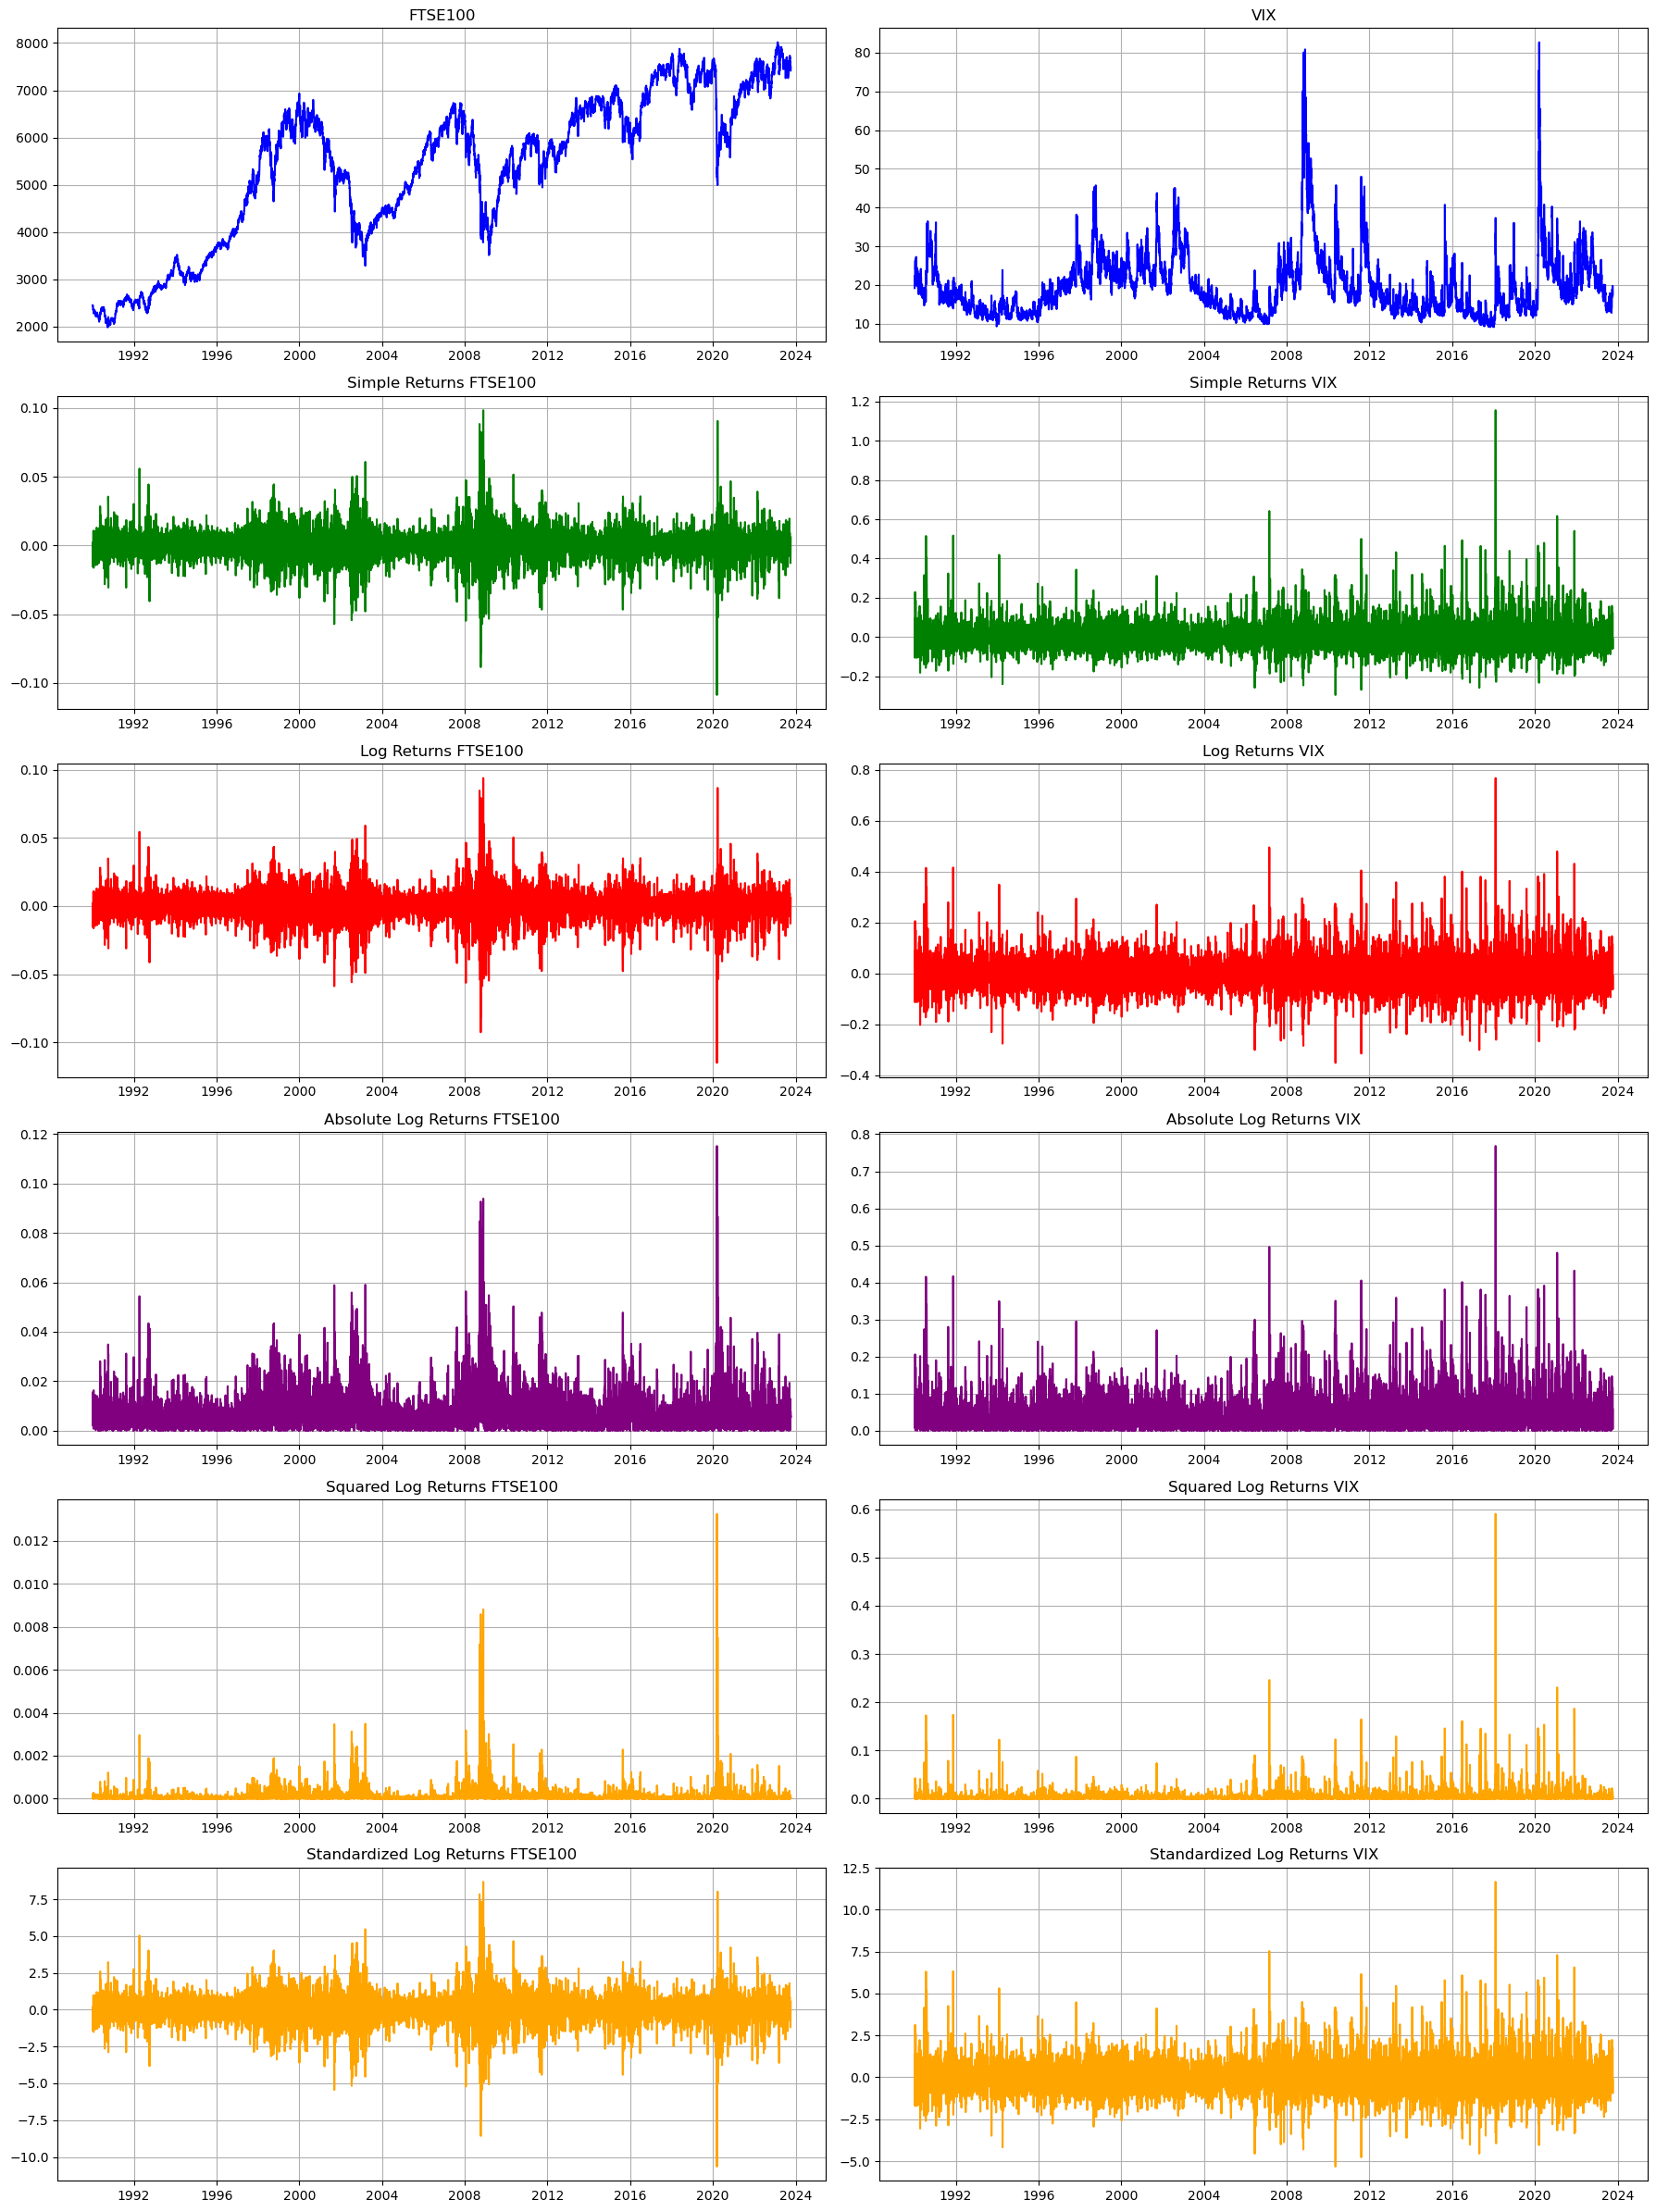

In [32]:
columns = ['FTSE100','VIX']

fig, ax = plt.subplots(nrows=6, ncols=2, figsize=(18, 24))

for i in range(len(columns)):
    col = columns[i]
    
    ax[0,i].plot(data[col], color='blue')
    ax[0,i].set_title(f'{col}')
    ax[0,i].grid(True)

    ax[1,i].plot(data[f'simple_returns_{col}'], color='green')
    ax[1,i].set_title(f'Simple Returns {col}')
    ax[1,i].grid(True)
    
    ax[2,i].plot(data[f'log_returns_{col}'], color='red')
    ax[2,i].set_title(f'Log Returns {col}')
    ax[2,i].grid(True)

    ax[3,i].plot(data[f'abs_log_returns_{col}'], color='purple')
    ax[3,i].set_title(f'Absolute Log Returns {col}')
    ax[3,i].grid(True)

    ax[4,i].plot(data[f'squared_log_returns_{col}'], color='orange')
    ax[4,i].set_title(f'Squared Log Returns {col}')
    ax[4,i].grid(True)

    ax[5,i].plot(data[f'std_log_returns_{col}'], color='orange')
    ax[5,i].set_title(f'Standardized Log Returns {col}')
    ax[5,i].grid(True)

plt.tight_layout()
plt.show()

In [33]:
def adf_test(series, name):
    print(f'Performing ADF Test on {name}')
    result = adfuller(series.dropna(), maxlag=20)  
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    
    print()

from statsmodels.tsa.stattools import adfuller

data_to_process = ['FTSE100', 'VIX', 'simple_returns_FTSE100',
                 'log_returns_FTSE100', 'std_log_returns_FTSE100', 
                 'abs_log_returns_FTSE100', 'squared_log_returns_FTSE100']

for col in data_to_process:
    series = data[col]
    adf_test(series, col)

Performing ADF Test on FTSE100
ADF Statistic: -1.792290
p-value: 0.384296
Critical Values:
	1%: -3.431094419181841
	5%: -2.861868983995307
	10%: -2.5669451131986794

Performing ADF Test on VIX
ADF Statistic: -6.889152
p-value: 0.000000
Critical Values:
	1%: -3.4310936572753645
	5%: -2.861868647325225
	10%: -2.566944933987006

Performing ADF Test on simple_returns_FTSE100
ADF Statistic: -23.432864
p-value: 0.000000
Critical Values:
	1%: -3.431094334448478
	5%: -2.861868946553461
	10%: -2.5669450932681404

Performing ADF Test on log_returns_FTSE100
ADF Statistic: -23.245985
p-value: 0.000000
Critical Values:
	1%: -3.431094334448478
	5%: -2.861868946553461
	10%: -2.5669450932681404

Performing ADF Test on std_log_returns_FTSE100
ADF Statistic: -23.245985
p-value: 0.000000
Critical Values:
	1%: -3.431094334448478
	5%: -2.861868946553461
	10%: -2.5669450932681404

Performing ADF Test on abs_log_returns_FTSE100
ADF Statistic: -10.563521
p-value: 0.000000
Critical Values:
	1%: -3.431094503934

In [44]:
descriptive_stats = data[['FTSE100', 'VIX', 'simple_returns_FTSE100',
                 'log_returns_FTSE100', 'std_log_returns_FTSE100', 
                 'abs_log_returns_FTSE100', 'squared_log_returns_FTSE100']].describe()
skewness = data[['FTSE100', 'VIX', 'simple_returns_FTSE100',
                 'log_returns_FTSE100', 'std_log_returns_FTSE100', 
                 'abs_log_returns_FTSE100', 'squared_log_returns_FTSE100']].skew()
kurtosis = data[['FTSE100', 'VIX', 'simple_returns_FTSE100',
                 'log_returns_FTSE100', 'std_log_returns_FTSE100', 
                 'abs_log_returns_FTSE100', 'squared_log_returns_FTSE100']].kurtosis() + 3
descriptive_stats.loc['skew'] = skewness
descriptive_stats.loc['kurtosis'] = kurtosis

for columns in ['FTSE100', 'VIX', 'simple_returns_FTSE100',
                 'log_returns_FTSE100', 'std_log_returns_FTSE100', 
                 'abs_log_returns_FTSE100', 'squared_log_returns_FTSE100']:
    acf_values = acf(data[columns].dropna(), nlags=1, fft=False)
    lag_1_acf = acf_values[1]
    descriptive_stats.loc['acf_lag_1'] = lag_1_acf
descriptive_stats.round(3)

,FTSE100,VIX,simple_returns_FTSE100,log_returns_FTSE100,std_log_returns_FTSE100,abs_log_returns_FTSE100,squared_log_returns_FTSE100
count,8807.000,8807.000,8807.000,8807.000,8807.000,8807.000,8807.000
mean,5369.992,19.594,0.000,0.000,0.012,0.007,0.000
std,1567.466,7.901,0.011,0.011,1.000,0.008,0.000
min,1990.200,9.140,-0.109,-0.115,-10.650,0.000,0.000
25%,4200.050,13.880,-0.005,-0.005,-0.460,0.002,0.000
50%,5756.850,17.800,0.000,0.000,0.007,0.005,0.000
75%,6572.730,23.015,0.006,0.006,0.516,0.010,0.000
max,8014.300,82.690,0.098,0.094,8.682,0.115,0.013
skew,-0.482,2.131,-0.132,-0.290,-0.290,3.036,14.488
kurtosis,2.151,11.180,10.733,10.884,10.884,21.188,345.058


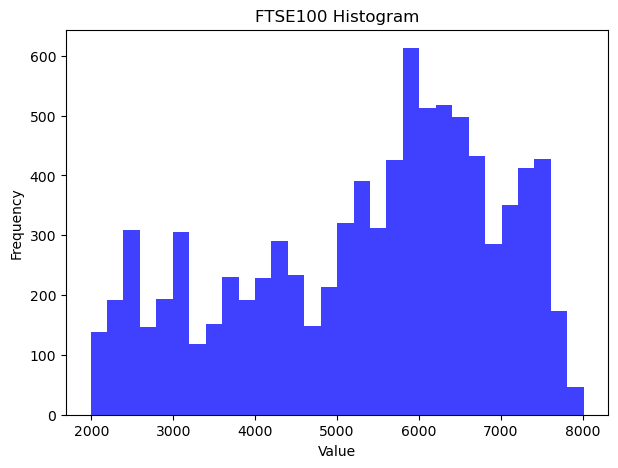

Jarque-Bera normality test for FTSE100: JB stat = 604.844, p-value = 0.000
Is FTSE100 normally distributed? No


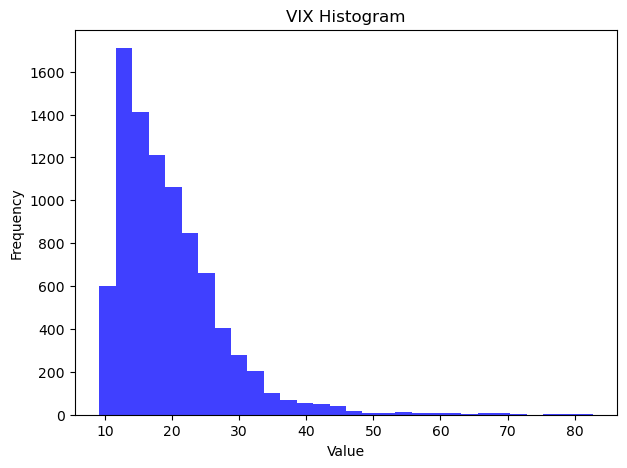

Jarque-Bera normality test for VIX: JB stat = 31187.405, p-value = 0.000
Is VIX normally distributed? No


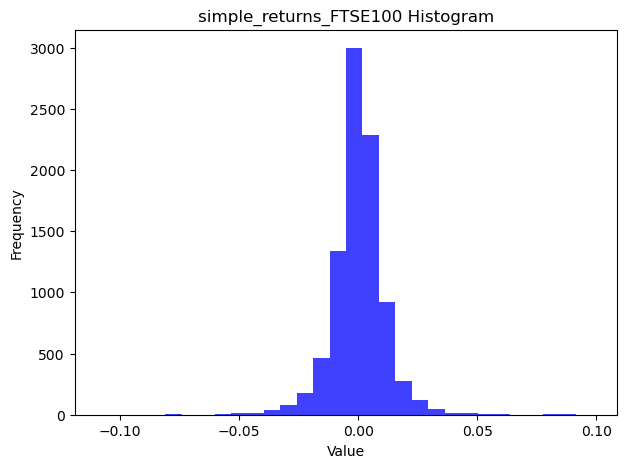

Jarque-Bera normality test for simple_returns_FTSE100: JB stat = 21940.523, p-value = 0.000
Is simple_returns_FTSE100 normally distributed? No


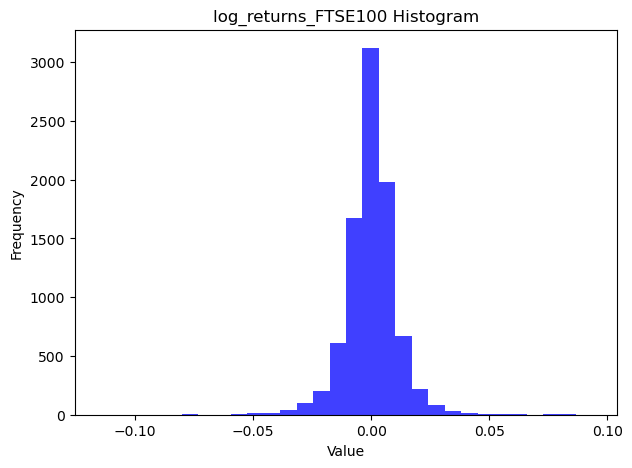

Jarque-Bera normality test for log_returns_FTSE100: JB stat = 22904.908, p-value = 0.000
Is log_returns_FTSE100 normally distributed? No


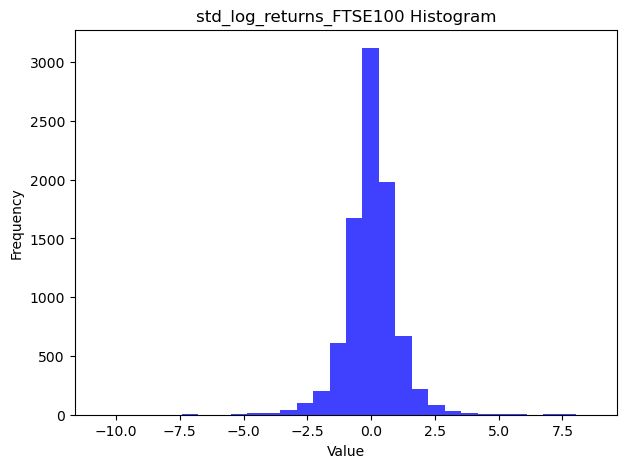

Jarque-Bera normality test for std_log_returns_FTSE100: JB stat = 22904.908, p-value = 0.000
Is std_log_returns_FTSE100 normally distributed? No


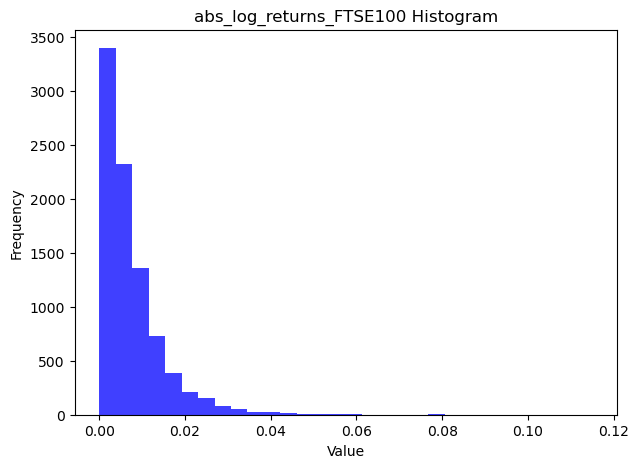

Jarque-Bera normality test for abs_log_returns_FTSE100: JB stat = 134764.426, p-value = 0.000
Is abs_log_returns_FTSE100 normally distributed? No


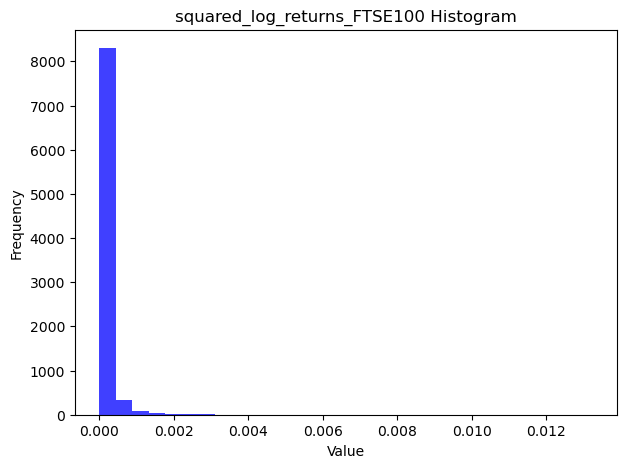

Jarque-Bera normality test for squared_log_returns_FTSE100: JB stat = 43194492.907, p-value = 0.000
Is squared_log_returns_FTSE100 normally distributed? No


In [45]:
from scipy.stats import jarque_bera
data_to_process = ['FTSE100', 'VIX', 'simple_returns_FTSE100',
                 'log_returns_FTSE100', 'std_log_returns_FTSE100', 
                 'abs_log_returns_FTSE100', 'squared_log_returns_FTSE100']
for col in data_to_process:
    series = data[col].dropna()
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 5))
    ax.hist(series, bins=30, alpha=0.75, color='blue')
    ax.set_title(f'{col} Histogram')
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')
    plt.show()

# Jarque-Bera test for normality
    jb_stat, p_value = jarque_bera(series)

# Determine if the series is normally distributed. If p-value >= 0.05, we fail to reject the null hypothesis of normality
    is_normal = "Yes" if p_value >= 0.05 else "No"

# Print the results of the Jarque-Bera test: the test statistic, p-value, and whether the series is normally distributed
# %s is our placeholder to insert a sting 
# %.3f is a placeholder to insert a float rounded to 3 decimal places
    print('Jarque-Bera normality test for %s: JB stat = %.3f, p-value = %.3f' %(col,jb_stat,p_value))
    print('Is %s normally distributed? %s' % (col,is_normal))

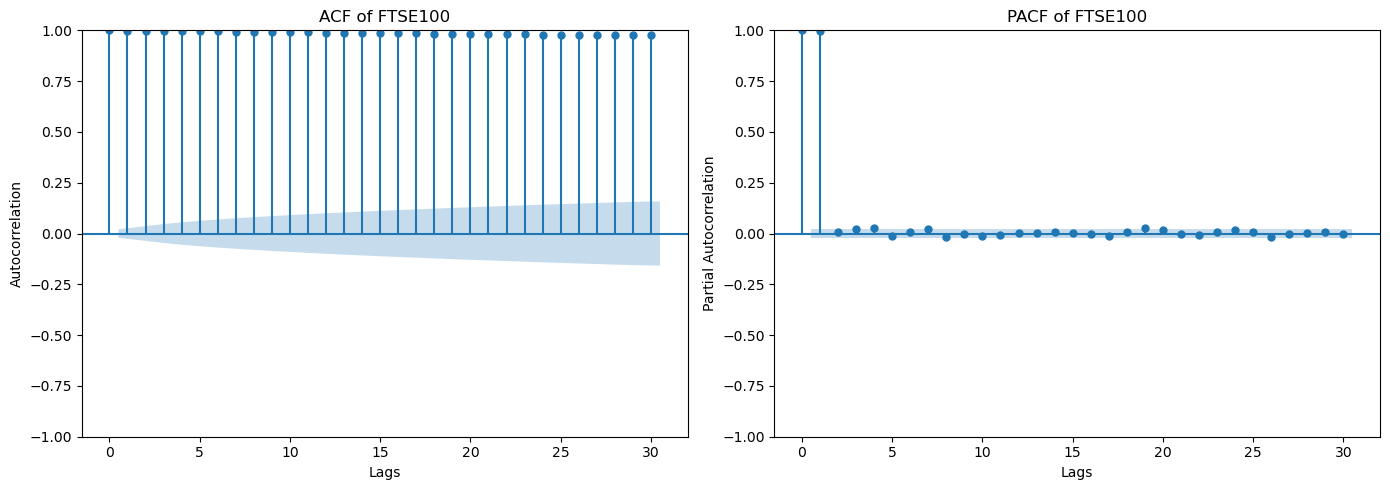

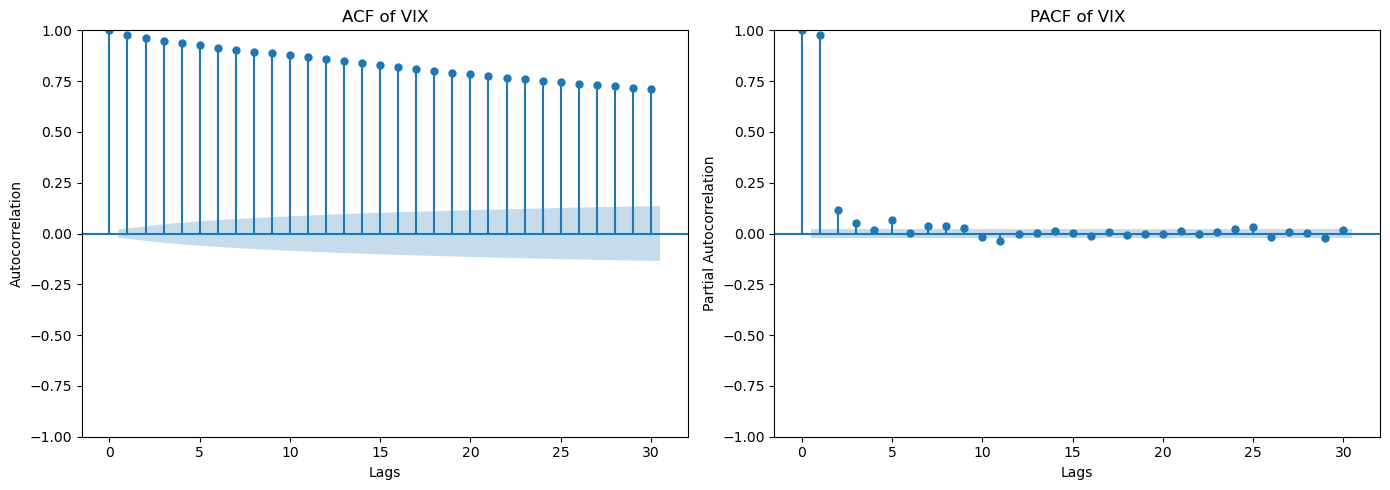

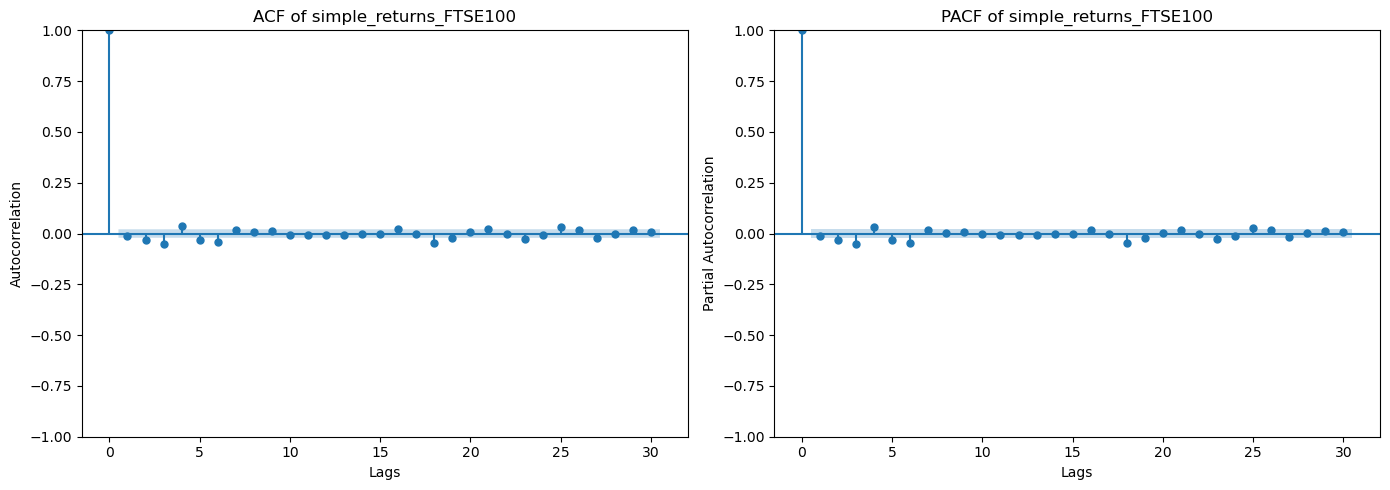

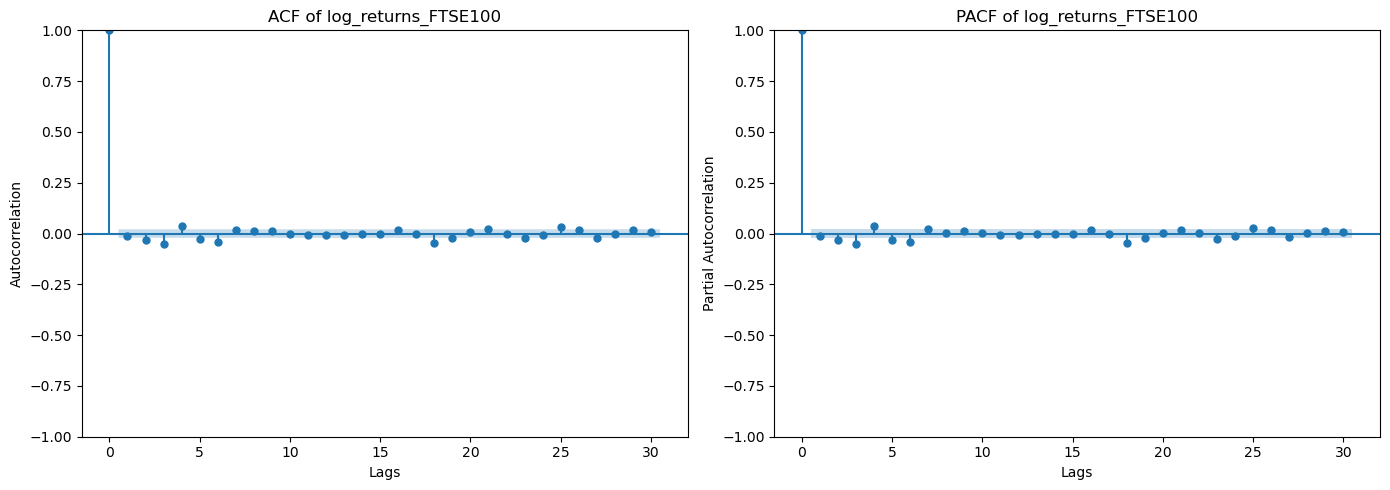

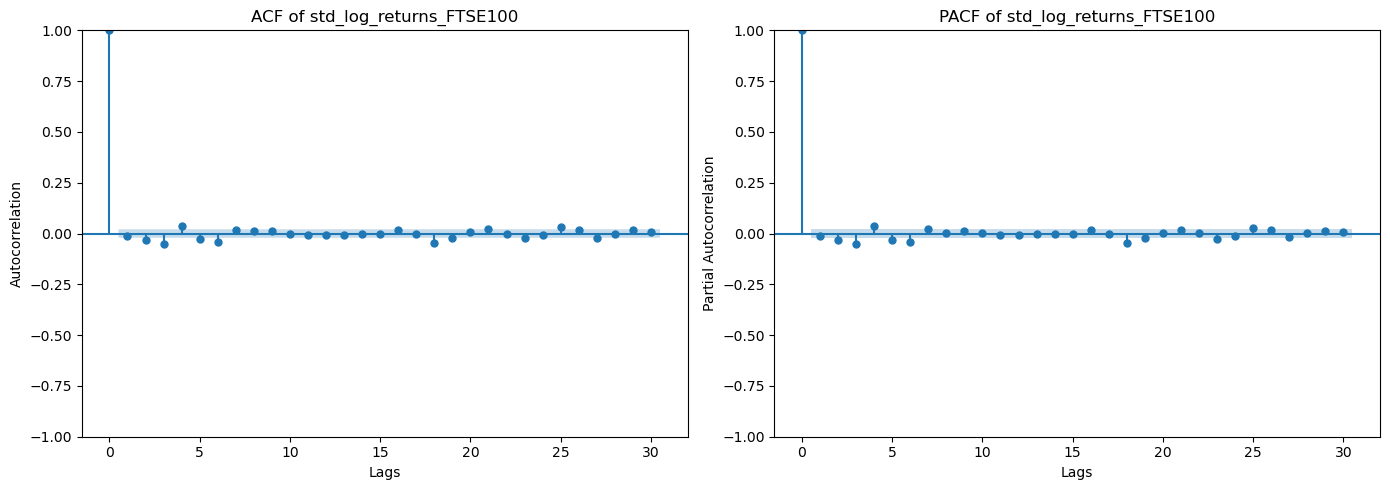

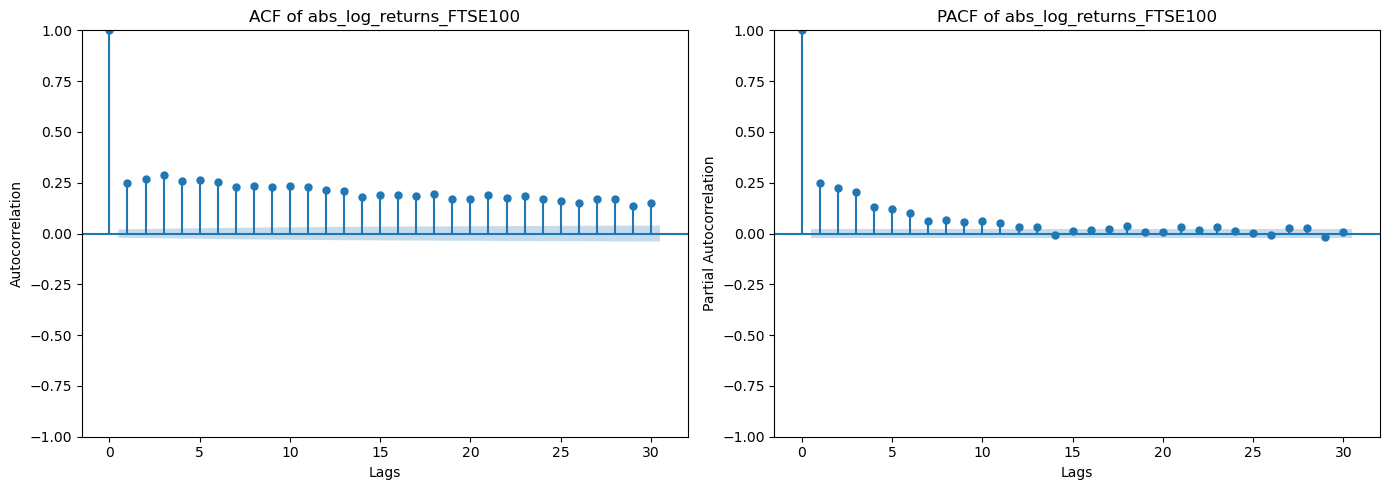

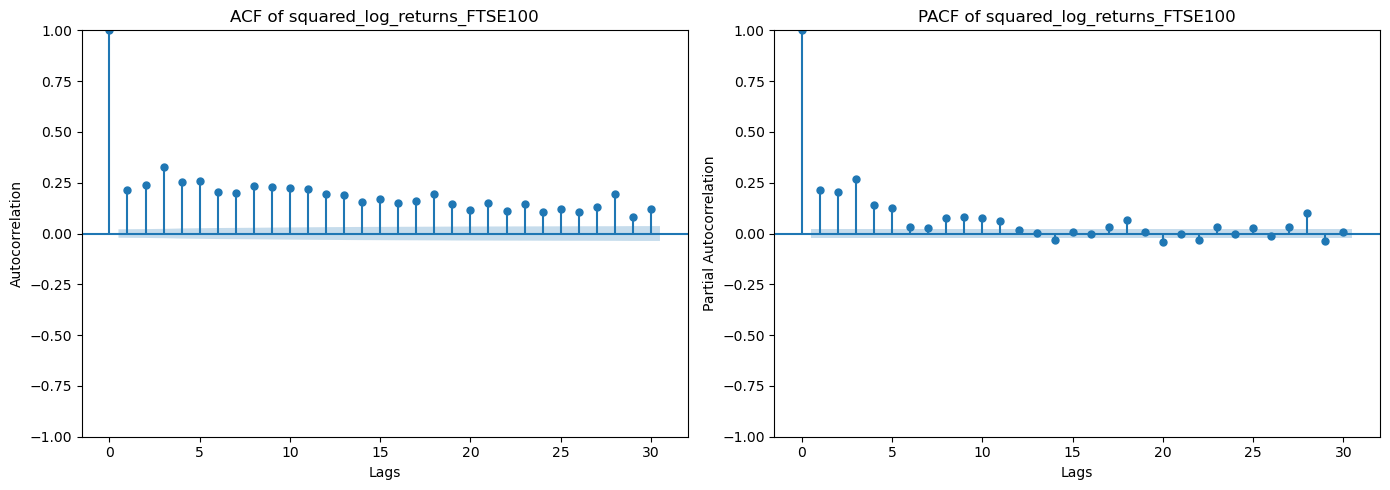

In [46]:
for col in data_to_process:
    series = data[col].dropna()

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))
    

    plot_acf(series, ax=axes[0], lags=30)  
    axes[0].set_title(f'ACF of {col}')
    axes[0].set_xlabel('Lags')
    axes[0].set_ylabel('Autocorrelation')
    
    plot_pacf(series, ax=axes[1], lags=30)  
    axes[1].set_title(f'PACF of {col}')
    axes[1].set_xlabel('Lags')
    axes[1].set_ylabel('Partial Autocorrelation')
    
    plt.tight_layout()
    plt.show()


In [47]:
for col in data_to_process:
    series = data[col].dropna()
    results_df = acorr_ljungbox(series, lags=10, return_df=True)
    print(f"Ljung-Box Test Results for {col}:")
    print(round(results_df,5))

Ljung-Box Test Results for FTSE100:
        lb_stat  lb_pvalue
1    8792.76958        0.0
2   17569.59035        0.0
3   26331.32077        0.0
4   35078.91655        0.0
5   43811.92646        0.0
6   52530.53201        0.0
7   61235.59408        0.0
8   69926.54340        0.0
9   78603.21872        0.0
10  87265.25568        0.0
Ljung-Box Test Results for VIX:
        lb_stat  lb_pvalue
1    8445.26864        0.0
2   16624.59130        0.0
3   24570.27422        0.0
4   32294.20064        0.0
5   39841.83714        0.0
6   47206.42816        0.0
7   54413.23686        0.0
8   61484.10982        0.0
9   68429.97446        0.0
10  75235.16976        0.0
Ljung-Box Test Results for simple_returns_FTSE100:
     lb_stat  lb_pvalue
1    1.66946    0.19633
2   11.88637    0.00262
3   36.53279    0.00000
4   47.70693    0.00000
5   55.90672    0.00000
6   72.21160    0.00000
7   75.07786    0.00000
8   75.95157    0.00000
9   76.95780    0.00000
10  77.19594    0.00000
Ljung-Box Test Results 

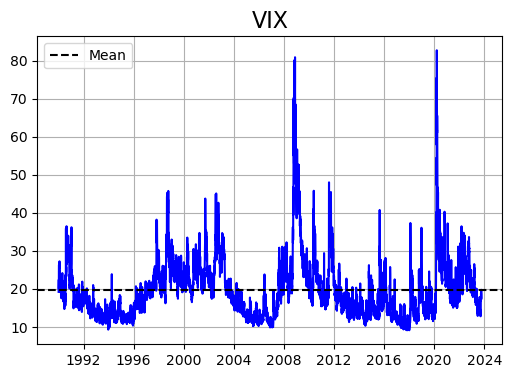

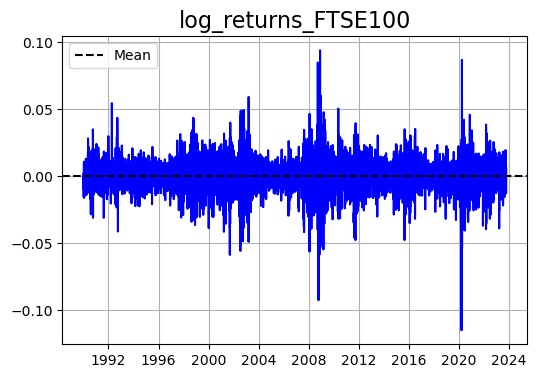

In [48]:
Chosen_data = ['VIX', 'log_returns_FTSE100']
for col in Chosen_data:
    fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
    ax.plot(data[col], color='blue')
    mean_value = data[col].mean()
    ax.axhline(mean_value, color='black', linestyle='--', label='Mean')
    ax.set_title(col, fontsize=16)
    ax.grid(True)
    ax.legend()
    plt.show()

In [49]:
data[data_to_process].corr()

,FTSE100,VIX,simple_returns_FTSE100,log_returns_FTSE100,std_log_returns_FTSE100,abs_log_returns_FTSE100,squared_log_returns_FTSE100
FTSE100,1.000000,-0.071518,0.010815,0.011508,0.011508,-0.052153,-0.041539
VIX,-0.071518,1.000000,-0.095045,-0.102138,-0.102138,0.469986,0.425864
simple_returns_FTSE100,0.010815,-0.095045,1.000000,0.999858,0.999858,-0.047202,-0.068111
log_returns_FTSE100,0.011508,-0.102138,0.999858,1.000000,1.000000,-0.061197,-0.084932
std_log_returns_FTSE100,0.011508,-0.102138,0.999858,1.000000,1.000000,-0.061197,-0.084932
abs_log_returns_FTSE100,-0.052153,0.469986,-0.047202,-0.061197,-0.061197,1.000000,0.829686
squared_log_returns_FTSE100,-0.041539,0.425864,-0.068111,-0.084932,-0.084932,0.829686,1.000000


- ##### Part b

In [50]:
lowest_aic = float('inf')
best_ARMA_FTSE = None

for p in range(1,4):
    for q in range(1,4):
        try:
            warnings.simplefilter('ignore', ValueWarning)
            model = ARIMA(data['log_returns_FTSE100'] * 100, order=(p, 0, q))  
            fit_model = model.fit()  
            if fit_model.aic < lowest_aic:
                lowest_aic = fit_model.aic
                best_ARMA_FTSE = fit_model
        except:
            continue

print(best_ARMA_FTSE.summary()) 

D:\Anaconda\Download\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Anaconda\Download\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
D:\Anaconda\Download\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Anaconda\Download\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                SARIMAX Results                                
Dep. Variable:     log_returns_FTSE100   No. Observations:                 8807
Model:                  ARIMA(2, 0, 3)   Log Likelihood              -13150.322
Date:                 Wed, 04 Dec 2024   AIC                          26314.643
Time:                         12:17:41   BIC                          26364.226
Sample:                     01-04-1990   HQIC                         26331.533
                          - 10-06-2023                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0126      0.011      1.130      0.258      -0.009       0.035
ar.L1         -0.6581      0.054    -12.204      0.000      -0.764      -0.552
ar.L2         -0.5120      0.057     -9.029 

In [51]:
lowest_aic = float('inf')
best_ARMA_VIX = None

for p in range(1,4):
    for q in range(1,4):
        try:
            warnings.simplefilter('ignore', ValueWarning)
            model = ARIMA(data['VIX'] * 100, order=(p, 0, q))  
            fit_model = model.fit()  
            if fit_model.aic < lowest_aic:
                lowest_aic = fit_model.aic
                best_ARMA_VIX = fit_model
        except:
            continue

print(best_ARMA_VIX.summary()) 

D:\Anaconda\Download\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Anaconda\Download\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                    VIX   No. Observations:                 8807
Model:                 ARIMA(3, 0, 3)   Log Likelihood              -57142.590
Date:                Wed, 04 Dec 2024   AIC                         114301.180
Time:                        12:18:21   BIC                         114357.847
Sample:                    01-04-1990   HQIC                        114320.483
                         - 10-06-2023                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       1959.3902    151.982     12.892      0.000    1661.511    2257.269
ar.L1          0.7430      0.046     16.148      0.000       0.653       0.833
ar.L2          0.9289      0.033     28.436      0.0

In [52]:
series = [best_ARMA_VIX,best_ARMA_FTSE]
for col in series:
    residuals = col.resid.dropna()
    arch_test = het_arch(residuals, nlags = 10)
    print(f"ARCH Test for %s: LM stat = %.3f, p-value = %.3f" %(col.model.endog_names,arch_test[0],arch_test[1]))

ARCH Test for VIX: LM stat = 1723.759, p-value = 0.000
ARCH Test for log_returns_FTSE100: LM stat = 1645.048, p-value = 0.000


In [53]:
best_aic_garch = float('inf')
best_garch_model_ftse = None

for p_star in range(1, 4):  
    for q_star in range(1, 4):  
        try:
            garch_model = arch_model(data['log_returns_FTSE100'] * 100, mean="Zero", vol='Garch', p=p_star, q=q_star)
            garch_result = garch_model.fit(disp="off")
            if garch_result.aic < best_aic_garch:
                best_aic_garch = garch_result.aic
                best_garch_model_ftse = garch_result
                best_order = (p_star,q_star)
        except:
            continue

print(best_garch_model_ftse.summary())
print('Best GARCH order for Log return FTSE 100:',best_order)

                        Zero Mean - GARCH Model Results                        
Dep. Variable:     log_returns_FTSE100   R-squared:                       0.000
Mean Model:                  Zero Mean   Adj. R-squared:                  0.000
Vol Model:                       GARCH   Log-Likelihood:               -11666.9
Distribution:                   Normal   AIC:                           23339.7
Method:             Maximum Likelihood   BIC:                           23361.0
                                         No. Observations:                 8807
Date:                 Wed, Dec 04 2024   Df Residuals:                     8807
Time:                         12:18:37   Df Model:                            0
                              Volatility Model                              
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0201  4.310e-03      4.654  3.25

In [54]:
best_aic_garch = float('inf')
best_garch_model_VIX = None

for p_star in range(1, 4):  
    for q_star in range(1, 4):  
        try:
            garch_model = arch_model(data['VIX'] * 100, mean="Zero", vol='Garch', p=p_star, q=q_star)
            garch_result = garch_model.fit(disp="off")
            if garch_result.aic < best_aic_garch:
                best_aic_garch = garch_result.aic
                best_garch_model_VIX = garch_result
                best_order = (p_star,q_star)
        except:
            continue

print(best_garch_model_VIX.summary())
print('Best GARCH order for VIX:',best_order)

D:\Anaconda\Download\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.242e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
D:\Anaconda\Download\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 6.242e+05. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 0.1 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
D:\Anaconda\Download\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning

                       Zero Mean - GARCH Model Results                        
Dep. Variable:                    VIX   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -78724.5
Distribution:                  Normal   AIC:                           157455.
Method:            Maximum Likelihood   BIC:                           157476.
                                        No. Observations:                 8807
Date:                Wed, Dec 04 2024   Df Residuals:                     8807
Time:                        12:18:40   Df Model:                            0
                               Volatility Model                              
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      8.9269e+04   7806.107     11.436  2.772e-30 

In [55]:
series = [best_garch_model_VIX,best_garch_model_ftse]
names = ['FTSE100','VIX']
for model,name in zip(series,names):
    std_resid = model.std_resid
    std_resid = std_resid.dropna()
    arch_test = het_arch(std_resid, nlags = 10)
    print(f"Post-GARCH ARCH Test for %s: LM stat = %.3f, p-value = %.3f" %(name,arch_test[0],arch_test[1]))


Post-GARCH ARCH Test for FTSE100: LM stat = 43.090, p-value = 0.000
Post-GARCH ARCH Test for VIX: LM stat = 9.719, p-value = 0.466


Jarque-Bera Test for FTSE100:
JB Statistic: 112056.571; p-value: 0.000
Jarque-Bera Test for VIX:
JB Statistic: 886.386; p-value: 0.000


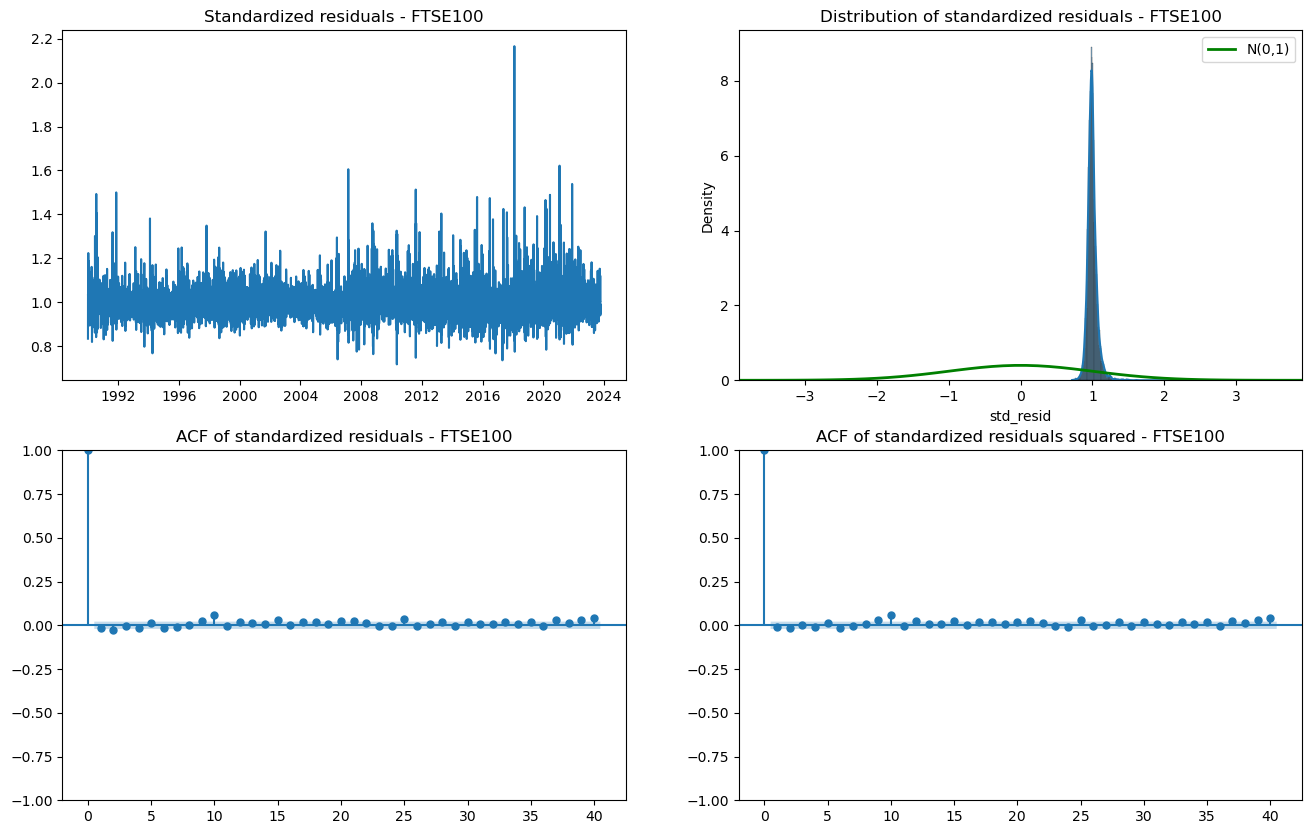

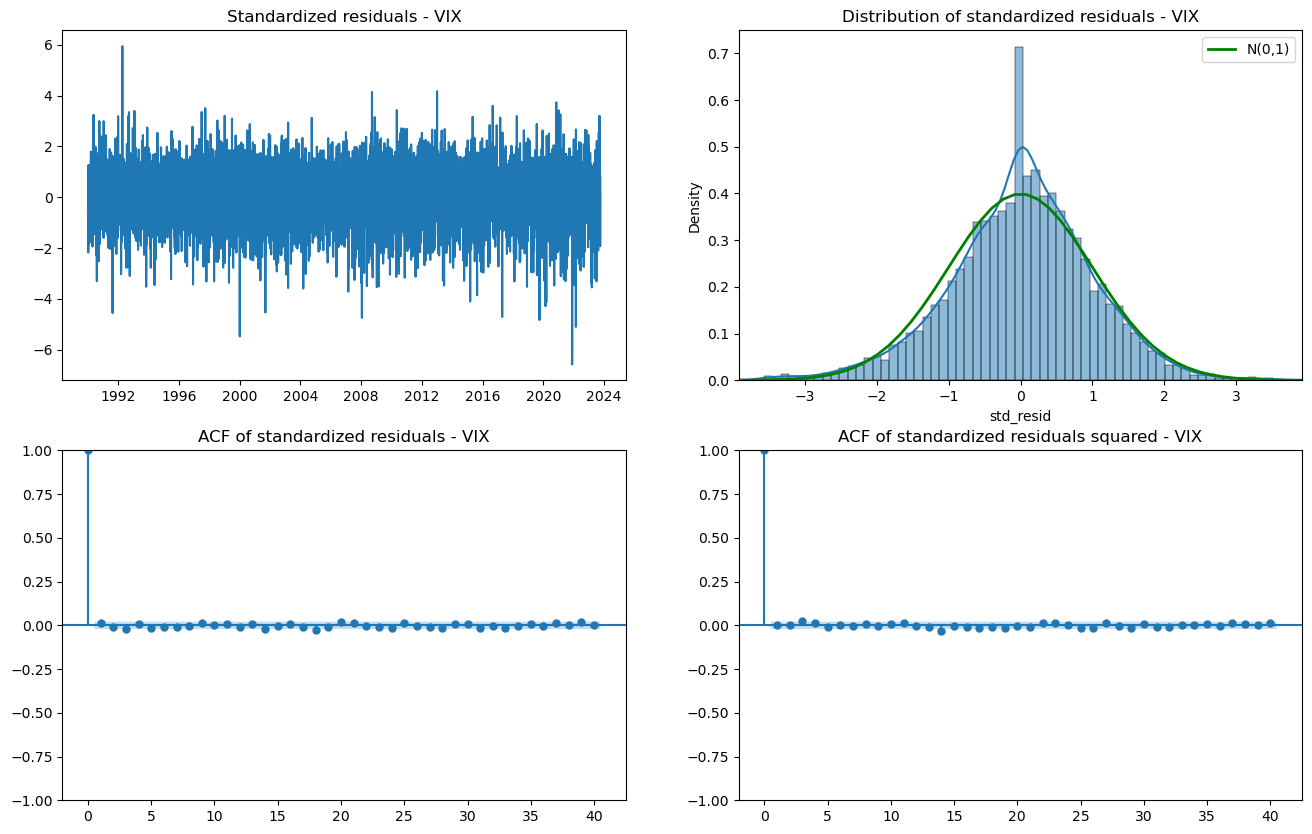

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.stats.stattools import jarque_bera

series = [best_garch_model_VIX,best_garch_model_ftse]
names = ['FTSE100','VIX']
for model,name in zip(series,names):
    std_resid = model.std_resid.dropna()
    fig, axes = plt.subplots(nrows=2,ncols=2,figsize=(16,10))
    axes[0 , 0].plot(std_resid)
    axes[0,0].set_title(f'Standardized residuals - {name}')

    ## distribution of residuals
    x_lim = (-1.96 * 2, 1.96 * 2)
    x_range = np.linspace(x_lim[0], x_lim[1])
    norm_pdf = stats.norm.pdf(x_range)
    sns.histplot(std_resid,kde=True,stat='density',ax=axes[0,1])
    axes[0,1].plot(x_range, norm_pdf, 'g', lw=2, label='N(0,1)')
    axes[0,1].set_title(f'Distribution of standardized residuals - {name}')
    axes[0,1].set_xlim(x_lim)
    axes[0,1].legend()

    # Perform Jarque-Bera test for normality
    jb_stat, jb_p_value, _, _ = jarque_bera(std_resid)
    print(f'Jarque-Bera Test for {name}:')
    print(f'JB Statistic: %.3f; p-value: %.3f' %(jb_stat, jb_p_value))


    ## ACF plot of standardized residual
    plot_acf(std_resid, ax=axes[1,0], alpha=0.05)
    axes[1,0].set_title(f'ACF of standardized residuals - {name}')
    

    ## ACF plot of squared standardized residual
    plot_acf(std_resid**2, ax=axes[1,1], alpha=0.05)
    axes[1,1].set_title(f'ACF of standardized residuals squared - {name}')
    

Part c

In [57]:
full_data = pd.read_csv('StockIndexFXDATA.csv')
full_data['DATE'] = pd.to_datetime(full_data['DATE'], format='%d/%m/%Y')
full_data.set_index('DATE', inplace=True)

indices = ['FTSE100', 'VIX']
full_data = full_data[indices]

def compute_returns(df, column):
    df[f'simple_returns_{column}'] = df[column] / df[column].shift(1) - 1
    df[f'log_returns_{column}'] = np.log(df[column] / df[column].shift(1))
    df[f'abs_log_returns_{column}'] = np.abs(df[f'log_returns_{column}'])
    df[f'squared_log_returns_{column}'] = df[f'log_returns_{column}'] ** 2
    std_dev = df[f'log_returns_{column}'].std()
    df[f'std_log_returns_{column}'] = df[f'log_returns_{column}'] / std_dev
    df_returns = df.dropna()
    return df_returns

for columns in indices:
    full_data = compute_returns(full_data, columns) 

full_data

,FTSE100,VIX,simple_returns_FTSE100,log_returns_FTSE100,abs_log_returns_FTSE100,squared_log_returns_FTSE100,std_log_returns_FTSE100,simple_returns_VIX,log_returns_VIX,abs_log_returns_VIX,squared_log_returns_VIX,std_log_returns_VIX
DATE,,,,,,,,,,,,
1990-01-04,2451.600000,19.220000,-0.004911,-0.004923,0.004923,0.000024,-0.455496,0.056625,0.055079,0.055079,0.003034,0.836060
1990-01-05,2444.500000,20.110000,-0.002896,-0.002900,0.002900,0.000008,-0.268322,0.046306,0.045266,0.045266,0.002049,0.687098
1990-01-08,2431.300000,20.260000,-0.005400,-0.005415,0.005415,0.000029,-0.500930,0.007459,0.007431,0.007431,0.000055,0.112801
1990-01-09,2436.300000,22.200000,0.002057,0.002054,0.002054,0.000004,0.190065,0.095755,0.091444,0.091444,0.008362,1.388042
1990-01-10,2412.600000,22.440000,-0.009728,-0.009775,0.009775,0.000096,-0.904392,0.010811,0.010753,0.010753,0.000116,0.163219
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-10-02,7510.700195,17.610001,-0.012802,-0.012885,0.012885,0.000166,-1.192052,0.005137,0.005124,0.005124,0.000026,0.077776
2023-10-03,7470.200195,19.780001,-0.005392,-0.005407,0.005407,0.000029,-0.500226,0.123225,0.116204,0.116204,0.013503,1.763887
2023-10-04,7412.500000,18.580000,-0.007724,-0.007754,0.007754,0.000060,-0.717374,-0.060667,-0.062586,0.062586,0.003917,-0.949998


In [58]:
def estimate_arma_garch(series, arma_order=(1,1), garch_order=(1,1), distribution='normal', print_output=True):
    
    # Check if there are MA terms in the Mean equation. If not, estimate AR-GARCH in single setp using arch
    if arma_order[1] == 0:
        model = arch_model(series, mean='AR', lags=arma_order[0], vol='GARCH', 
                           p=garch_order[0], q=garch_order[1], dist=distribution)
        garch_fit = model.fit(disp='off')
        if print_output: 
            print(garch_fit.summary())
        
        arma_fit = None # Set arma_fit to None
            
    else: 
        # Perform 2-step estimation
        # Step 1: Estimate ARMA mean equation and extract the residuals
        mean_eq = ARIMA(series, order = (arma_order[0],0,arma_order[1]))
        arma_fit = mean_eq.fit()
        resid = arma_fit.resid.dropna(); resid.name = 'Residuals'
        if print_output: 
            print(arma_fit.summary())

        # Step 2: Fit a Constant-mean GARCH model to the ARMA residuals
        var_eq = arch_model(resid, mean = 'Zero', vol='GARCH', p=garch_order[0], q=garch_order[1], dist=distribution)
        garch_fit = var_eq.fit(disp='off')
        if print_output: 
            print(garch_fit.summary())

    return arma_fit, garch_fit

In [59]:
warnings.simplefilter('ignore', ValueWarning)

def arma_garch_estimate_and_forecast(serie, cutoff_date, arma_order=(1,1), garch_order=(1, 1), 
                                     distribution='normal', print_output=True):
    
    # Create dataframe to store the forecasts
    forecast_df = pd.DataFrame(index=serie.index)
    forecast_df['true_value'] = serie
    forecast_df['mean_forecast'] = serie * np.nan  # return forecasts
    forecast_df['var_forecast'] = serie * np.nan  # variance forecasts

    
    # Check if there are MA terms in the Mean equation. If not, estimate AR-GARCH in single step using arch 
    if arma_order[1] == 0:
        ## Step 1: Estimate AR-GARCH model
        model = arch_model(serie, mean='AR', lags=arma_order[0], vol='GARCH', 
                           p=garch_order[0], q=garch_order[1], dist=distribution)
        # Estimate the model using data before cutoff_date 
        garch_fit = model.fit(last_obs=cutoff_date, disp='off')
        arma_fit = None
        if print_output:
            print(garch_fit.summary())
        
        # Produce forecasts
        fcasts = garch_fit.forecast(align='target')
        forecast_df['mean_forecast'] = fcasts.mean
        forecast_df['var_forecast'] = fcasts.variance
        
        
    else:
        # There are MA terms in the Mean Equation. Perform 2-step estimation and forecasts.    

        ## Step 1: Obtain in-sample/train & out-of-sample/test dataset
        train = serie.loc[serie.index < cutoff_date]
        test = serie.loc[serie.index >= cutoff_date]

        ## Step 2: Estimate ARMA-GARCH model using train dataset
        arma_fit, garch_fit = estimate_arma_garch(train, arma_order, garch_order, distribution, print_output)

        ## Step 3: Produce mean forecasts based on ARMA model
        for fdate in test.index:
            # Step a: Get an expanded in-sample data by one obs at a time
            y = serie.loc[serie.index < fdate]

            # Step b: Apply the estimated model to the new data
            arma_fit_ext = arma_fit.apply(y, refit=False)

            # Step c: Produce one-step ahead forecast
            forecast_df.loc[fdate, 'mean_forecast'] = arma_fit_ext.forecast().iloc[0]

        ## Step 4: Compute return forecast residuals/errors
        residf = test - forecast_df.loc[serie.index >= cutoff_date]['mean_forecast']
        resid = pd.concat([arma_fit.resid, residf])

        ## Step 5: Produce variance forecasts
        var_eq = arch_model(resid, mean='Zero', vol='GARCH', p=garch_order[0], q=garch_order[1], dist=distribution)
        var_eq_fit = var_eq.fit(last_obs=cutoff_date, disp='off')
        
        # Produce variance forecasts
        forecast_df['var_forecast'] = var_eq_fit.forecast(align='target').variance
        
    return forecast_df, arma_fit, garch_fit

In [60]:
def evaluate_forecasts(actual, predictions):
    # Calculate the forecast errors by subtracting actual values from predictions
    errors = predictions - actual 
    rmspe = np.sqrt(np.mean(errors**2))  # Root Mean Squared Prediction Error
    mape = np.mean(np.abs(errors))  # Mean Absolute Prediction Error
    mdape = np.median(np.abs(errors))  # Median Absolute Prediction Error
    return rmspe, mape, mdape

In [62]:
VIX = full_data['VIX'].dropna()
Log_returen_FTSE =full_data['log_returns_FTSE100'].dropna()

In [63]:
cutoff_date = pd.to_datetime('2022-01-01')
forecast_df_VIX_1, arma_fit_VIX_1, garch_fit_VIX_1 = arma_garch_estimate_and_forecast(VIX, cutoff_date, arma_order=(3,3), garch_order=(1, 1))
forecast_df_VIX_1

                               SARIMAX Results                                
Dep. Variable:                    VIX   No. Observations:                 8347
Model:                 ARIMA(3, 0, 3)   Log Likelihood              -15756.680
Date:                Wed, 04 Dec 2024   AIC                          31529.359
Time:                        12:19:40   BIC                          31585.597
Sample:                    01-04-1990   HQIC                         31548.568
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.4579      1.603     12.139      0.000      16.316      22.600
ar.L1          0.8229      0.075     10.905      0.000       0.675       0.971
ar.L2          0.8006      0.079     10.074      0.0

,true_value,mean_forecast,var_forecast
DATE,,,
1990-01-04,19.220000,NaN,NaN
1990-01-05,20.110000,NaN,NaN
1990-01-08,20.260000,NaN,NaN
1990-01-09,22.200000,NaN,NaN
1990-01-10,22.440000,NaN,NaN
...,...,...,...
2023-10-02,17.610001,17.499009,1.282227
2023-10-03,19.780001,17.586466,1.096861
2023-10-04,18.580000,19.451544,1.880498


In [64]:
forecast_df_VIX_1.dropna()

,true_value,mean_forecast,var_forecast
DATE,,,
2022-01-03,16.600000,17.309878,1.360314
2022-01-04,16.910000,16.808006,1.253979
2022-01-05,19.730000,16.979126,1.074127
2022-01-06,19.610001,19.400322,2.396719
2022-01-07,18.760000,19.441405,1.985265
...,...,...,...
2023-10-02,17.610001,17.499009,1.282227
2023-10-03,19.780001,17.586466,1.096861
2023-10-04,18.580000,19.451544,1.880498


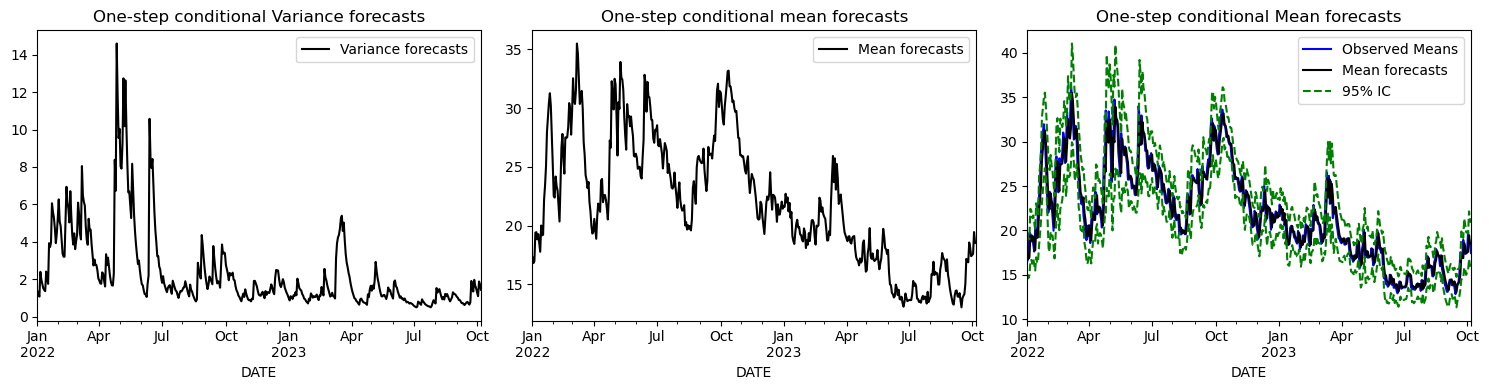

In [65]:
fig, ax = plt.subplots(1, 3, figsize = (15,4))
ret_true = forecast_df_VIX_1.loc[forecast_df_VIX_1.index>=cutoff_date,'true_value']
retf = forecast_df_VIX_1.loc[forecast_df_VIX_1.index>=cutoff_date,'mean_forecast']
varf = forecast_df_VIX_1.loc[forecast_df_VIX_1.index>=cutoff_date,'var_forecast']
retf_lb = retf - 1.96*varf**0.5 # Lower bound 95%
retf_ub = retf + 1.96*varf**0.5 # Upper bound 95%

varf.plot(ax=ax[0],style='k',label='Variance forecasts')
ax[0].set_title('One-step conditional Variance forecasts')
ax[0].set_xlim(varf.index[0],varf.index[-1])
ax[0].legend(loc='best')


retf.plot(ax=ax[1],style='k',label='Mean forecasts')
ax[1].set_title('One-step conditional mean forecasts')
ax[1].set_xlim(retf.index[0],retf.index[-1])
ax[1].legend(loc='best')

ret_true.plot(ax=ax[2],style='b',label='Observed Means')
retf.plot(ax=ax[2],style='k',label='Mean forecasts')
retf_lb.plot(ax=ax[2],style='g--',label='95% IC')
retf_ub.plot(ax=ax[2],style='g--',label='')
ax[2].set_title('One-step conditional Mean forecasts')
ax[2].set_xlim(retf.index[0],retf.index[-1])
ax[2].legend(loc='best')

plt.tight_layout()
plt.show()


In [66]:
cutoff_date = pd.to_datetime('2022-01-01')
forecast_df_VIX_2, arma_fit_VIX_2, garch_fit_VIX_2 = arma_garch_estimate_and_forecast(VIX, cutoff_date, arma_order=(1,1), garch_order=(1, 1))
forecast_df_VIX_2

                               SARIMAX Results                                
Dep. Variable:                    VIX   No. Observations:                 8347
Model:                 ARIMA(1, 0, 1)   Log Likelihood              -15780.945
Date:                Wed, 04 Dec 2024   AIC                          31569.889
Time:                        12:28:41   BIC                          31598.008
Sample:                    01-04-1990   HQIC                         31579.493
                         - 12-31-2021                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.4599      1.318     14.763      0.000      16.876      22.043
ar.L1          0.9846      0.001   1044.589      0.000       0.983       0.986
ma.L1         -0.1370      0.004    -32.757      0.0

,true_value,mean_forecast,var_forecast
DATE,,,
1990-01-04,19.220000,NaN,NaN
1990-01-05,20.110000,NaN,NaN
1990-01-08,20.260000,NaN,NaN
1990-01-09,22.200000,NaN,NaN
1990-01-10,22.440000,NaN,NaN
...,...,...,...
2023-10-02,17.610001,17.547697,1.290863
2023-10-03,19.780001,17.629911,1.096713
2023-10-04,18.580000,19.480491,1.868519


In [67]:
forecast_df_VIX_2.dropna()

,true_value,mean_forecast,var_forecast
DATE,,,
2022-01-03,16.600000,17.269262,1.285700
2022-01-04,16.910000,16.735676,1.181505
2022-01-05,19.730000,16.925327,1.016179
2022-01-06,19.610001,19.341573,2.454246
2022-01-07,18.760000,19.570914,2.023514
...,...,...,...
2023-10-02,17.610001,17.547697,1.290863
2023-10-03,19.780001,17.629911,1.096713
2023-10-04,18.580000,19.480491,1.868519


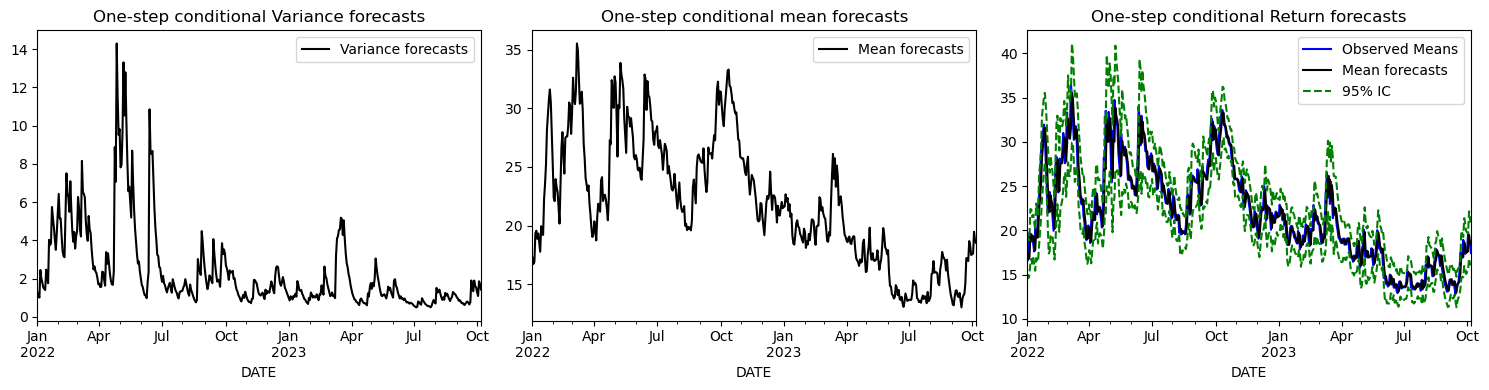

In [68]:
fig, ax = plt.subplots(1, 3, figsize = (15,4))
ret_true = forecast_df_VIX_2.loc[forecast_df_VIX_2.index>=cutoff_date,'true_value']
retf = forecast_df_VIX_2.loc[forecast_df_VIX_2.index>=cutoff_date,'mean_forecast']
varf = forecast_df_VIX_2.loc[forecast_df_VIX_2.index>=cutoff_date,'var_forecast']
retf_lb = retf - 1.96*varf**0.5 # Lower bound 95%
retf_ub = retf + 1.96*varf**0.5 # Upper bound 95%

varf.plot(ax=ax[0],style='k',label='Variance forecasts')
ax[0].set_title('One-step conditional Variance forecasts')
ax[0].set_xlim(varf.index[0],varf.index[-1])
ax[0].legend(loc='best')


retf.plot(ax=ax[1],style='k',label='Mean forecasts')
ax[1].set_title('One-step conditional mean forecasts')
ax[1].set_xlim(retf.index[0],retf.index[-1])
ax[1].legend(loc='best')

ret_true.plot(ax=ax[2],style='b',label='Observed Means')
retf.plot(ax=ax[2],style='k',label='Mean forecasts')
retf_lb.plot(ax=ax[2],style='g--',label='95% IC')
retf_ub.plot(ax=ax[2],style='g--',label='')
ax[2].set_title('One-step conditional Return forecasts')
ax[2].set_xlim(retf.index[0],retf.index[-1])
ax[2].legend(loc='best')

plt.tight_layout()
plt.show()

In [69]:
rmspe_VIX_1,mapr_VIX_1,mdape_VIX_1 = evaluate_forecasts(forecast_df_VIX_1.dropna()['true_value'],forecast_df_VIX_1.dropna()['mean_forecast'])
rmspe_VIX_2,mapr_VIX_2,mdape_VIX_2 = evaluate_forecasts(forecast_df_VIX_2.dropna()['true_value'],forecast_df_VIX_2.dropna()['mean_forecast'])
print('For model 1:\n rmspe:', rmspe_VIX_1, 'mapr:', mapr_VIX_1, 'mdape:', mdape_VIX_1)
print('For model 2:\n rmspe:', rmspe_VIX_2, 'mapr:', mapr_VIX_2, 'mdape:', mdape_VIX_2)

For model 1:
 rmspe: 1.4512752710496108 mapr: 1.035343547917168 mdape: 0.7845532673732487
For model 2:
 rmspe: 1.4562066619501404 mapr: 1.0371200659970314 mdape: 0.7788967803281786


In [70]:
cutoff_date = pd.to_datetime('2022-01-01')
forecast_df_FTSE_1, arma_fit_FTSE_1, garch_fit_FTSE_1 = arma_garch_estimate_and_forecast(Log_returen_FTSE, cutoff_date, arma_order=(2,3), garch_order=(1, 1))
forecast_df_FTSE_1

                                SARIMAX Results                                
Dep. Variable:     log_returns_FTSE100   No. Observations:                 8347
Model:                  ARIMA(2, 0, 3)   Log Likelihood               25904.254
Date:                 Wed, 04 Dec 2024   AIC                         -51794.509
Time:                         12:37:41   BIC                         -51745.301
Sample:                     01-04-1990   HQIC                        -51777.701
                          - 12-31-2021                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      1.121      0.262   -9.63e-05       0.000
ar.L1         -0.3783      0.084     -4.500      0.000      -0.543      -0.214
ar.L2         -0.2565      0.087     -2.935 

D:\Anaconda\Download\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000118. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
D:\Anaconda\Download\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.000118. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


,true_value,mean_forecast,var_forecast
DATE,,,
1990-01-04,-0.004923,NaN,NaN
1990-01-05,-0.002900,NaN,NaN
1990-01-08,-0.005415,NaN,NaN
1990-01-09,0.002054,NaN,NaN
1990-01-10,-0.009775,NaN,NaN
...,...,...,...
2023-10-02,-0.012885,0.000277,0.000045
2023-10-03,-0.005407,0.000171,0.000059
2023-10-04,-0.007754,0.000576,0.000057


In [71]:
forecast_df_FTSE_1.dropna()

,true_value,mean_forecast,var_forecast
DATE,,,
2022-01-03,0.000000,-0.000145,0.000054
2022-01-04,0.016213,0.000532,0.000049
2022-01-05,0.001558,0.000009,0.000070
2022-01-06,-0.008886,-0.000523,0.000064
2022-01-07,0.004673,-0.000654,0.000066
...,...,...,...
2023-10-02,-0.012885,0.000277,0.000045
2023-10-03,-0.005407,0.000171,0.000059
2023-10-04,-0.007754,0.000576,0.000057


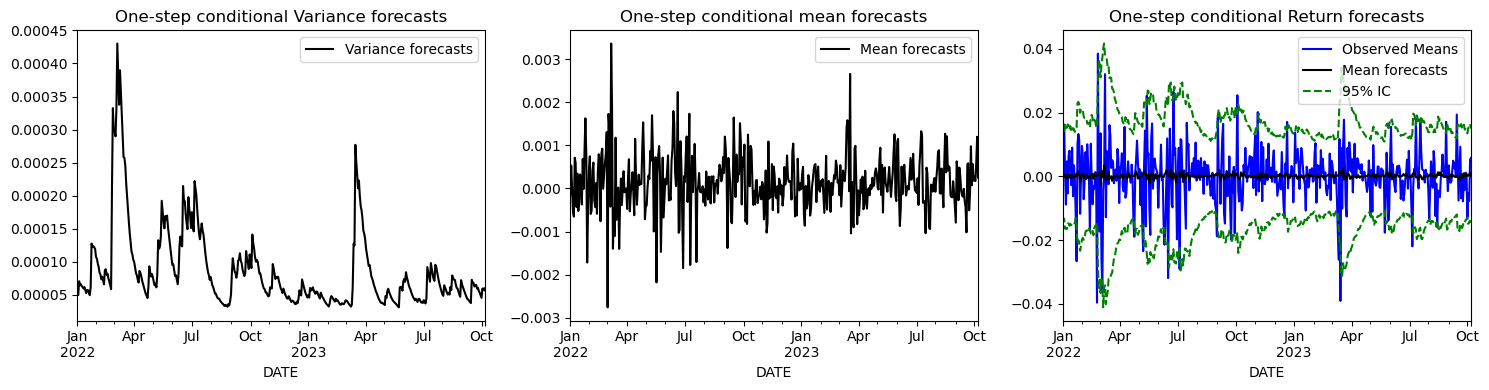

In [72]:
# Optional: Plotting the conditional variance & return forecasts
# Plot
fig, ax = plt.subplots(1, 3, figsize = (15,4))
ret_true = forecast_df_FTSE_1.loc[forecast_df_FTSE_1.index>=cutoff_date,'true_value']
retf = forecast_df_FTSE_1.loc[forecast_df_FTSE_1.index>=cutoff_date,'mean_forecast']
varf = forecast_df_FTSE_1.loc[forecast_df_FTSE_1.index>=cutoff_date,'var_forecast']
retf_lb = retf - 1.96*varf**0.5 # Lower bound 95%
retf_ub = retf + 1.96*varf**0.5 # Upper bound 95%

# ax[0]: Conditional variance forecasts
varf.plot(ax=ax[0],style='k',label='Variance forecasts')
ax[0].set_title('One-step conditional Variance forecasts')
ax[0].set_xlim(varf.index[0],varf.index[-1])
ax[0].legend(loc='best')


# ax[1]: Mean forecast
retf.plot(ax=ax[1],style='k',label='Mean forecasts')
ax[1].set_title('One-step conditional mean forecasts')
ax[1].set_xlim(retf.index[0],retf.index[-1])
ax[1].legend(loc='best')

# ax[2]: Mean forecast vs true
ret_true.plot(ax=ax[2],style='b',label='Observed Means')
retf.plot(ax=ax[2],style='k',label='Mean forecasts')
retf_lb.plot(ax=ax[2],style='g--',label='95% IC')
retf_ub.plot(ax=ax[2],style='g--',label='')
ax[2].set_title('One-step conditional Return forecasts')
ax[2].set_xlim(retf.index[0],retf.index[-1])
ax[2].legend(loc='best')

plt.tight_layout()
plt.show()


In [73]:
cutoff_date = pd.to_datetime('2022-01-01')
forecast_df_FTSE_2, arma_fit_FTSE_2, garch_fit_FTSE_2 = arma_garch_estimate_and_forecast(Log_returen_FTSE, cutoff_date, arma_order=(1,1), garch_order=(1, 1))
forecast_df_FTSE_2

D:\Anaconda\Download\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
D:\Anaconda\Download\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                                SARIMAX Results                                
Dep. Variable:     log_returns_FTSE100   No. Observations:                 8347
Model:                  ARIMA(1, 0, 1)   Log Likelihood               25878.447
Date:                 Wed, 04 Dec 2024   AIC                         -51748.894
Time:                         12:47:11   BIC                         -51720.776
Sample:                     01-04-1990   HQIC                        -51739.290
                          - 12-31-2021                                         
Covariance Type:                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      1.054      0.292      -0.000       0.000
ar.L1      -1.645e-06      0.003     -0.001      1.000      -0.006       0.006
ma.L1      -1.646e-06      0.003     -0.001 

D:\Anaconda\Download\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(
D:\Anaconda\Download\Lib\site-packages\arch\univariate\base.py:309: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0001187. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


,true_value,mean_forecast,var_forecast
DATE,,,
1990-01-04,-0.004923,NaN,NaN
1990-01-05,-0.002900,NaN,NaN
1990-01-08,-0.005415,NaN,NaN
1990-01-09,0.002054,NaN,NaN
1990-01-10,-0.009775,NaN,NaN
...,...,...,...
2023-10-02,-0.012885,0.000128,0.000046
2023-10-03,-0.005407,0.000128,0.000060
2023-10-04,-0.007754,0.000128,0.000058


In [74]:
forecast_df_FTSE_2.dropna()

,true_value,mean_forecast,var_forecast
DATE,,,
2022-01-03,0.000000,0.000128,0.000055
2022-01-04,0.016213,0.000128,0.000051
2022-01-05,0.001558,0.000128,0.000073
2022-01-06,-0.008886,0.000128,0.000067
2022-01-07,0.004673,0.000128,0.000069
...,...,...,...
2023-10-02,-0.012885,0.000128,0.000046
2023-10-03,-0.005407,0.000128,0.000060
2023-10-04,-0.007754,0.000128,0.000058


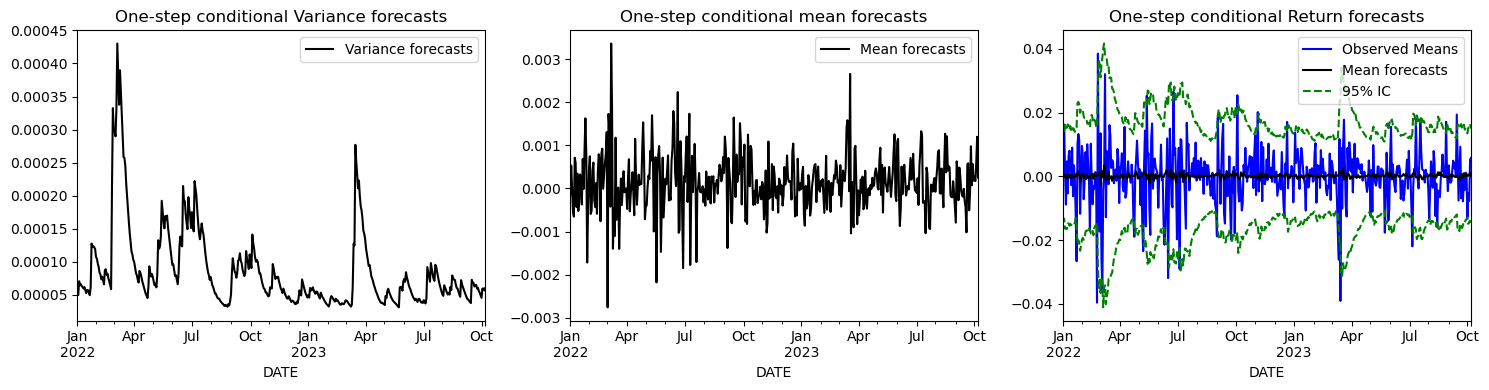

In [75]:
fig, ax = plt.subplots(1, 3, figsize = (15,4))
ret_true = forecast_df_FTSE_2.loc[forecast_df_FTSE_2.index>=cutoff_date,'true_value']
retf = forecast_df_FTSE_1.loc[forecast_df_FTSE_2.index>=cutoff_date,'mean_forecast']
varf = forecast_df_FTSE_1.loc[forecast_df_FTSE_2.index>=cutoff_date,'var_forecast']
retf_lb = retf - 1.96*varf**0.5 # Lower bound 95%
retf_ub = retf + 1.96*varf**0.5 # Upper bound 95%

# ax[0]: Conditional variance forecasts
varf.plot(ax=ax[0],style='k',label='Variance forecasts')
ax[0].set_title('One-step conditional Variance forecasts')
ax[0].set_xlim(varf.index[0],varf.index[-1])
ax[0].legend(loc='best')


# ax[1]: Mean forecast
retf.plot(ax=ax[1],style='k',label='Mean forecasts')
ax[1].set_title('One-step conditional mean forecasts')
ax[1].set_xlim(retf.index[0],retf.index[-1])
ax[1].legend(loc='best')

# ax[2]: Mean forecast vs true
ret_true.plot(ax=ax[2],style='b',label='Observed Means')
retf.plot(ax=ax[2],style='k',label='Mean forecasts')
retf_lb.plot(ax=ax[2],style='g--',label='95% IC')
retf_ub.plot(ax=ax[2],style='g--',label='')
ax[2].set_title('One-step conditional Return forecasts')
ax[2].set_xlim(retf.index[0],retf.index[-1])
ax[2].legend(loc='best')

plt.tight_layout()
plt.show()

In [76]:
rmspe_FTSE_1,mapr_FTSE_1,mdape_FTSE_1 = evaluate_forecasts(forecast_df_FTSE_1.dropna()['true_value'],forecast_df_FTSE_1.dropna()['mean_forecast'])
rmspe_FTSE_2,mapr_FTSE_2,mdape_FTSE_2 = evaluate_forecasts(forecast_df_FTSE_2.dropna()['true_value'],forecast_df_FTSE_2.dropna()['mean_forecast'])
print('For FTSE model 1:\n rmspe:', rmspe_FTSE_1, 'mapr:', mapr_FTSE_1, 'mdape:', mdape_FTSE_1)
print('For FTSE model 2:\n rmspe:', rmspe_FTSE_2, 'mapr:', mapr_FTSE_2, 'mdape:', mdape_FTSE_2)

For FTSE model 1:
 rmspe: 0.009046879703738353 mapr: 0.00621673172611388 mdape: 0.004203905799376285
For FTSE model 2:
 rmspe: 0.009045849401274828 mapr: 0.006243526943390957 mdape: 0.004101848610735665


II

In [77]:
from scipy.stats import norm
def diebold_mario(floss1, floss2):
    '''
    This function only works for one-step ahead forecasts, i.e. forecast horizon = 1
    
    Input:
        floss1: a 1-D array-like object of forecast losses (e.g. |e| or e^2) for model 1
        floss2: a 1-D array-like object of forecast losses for model 2
    '''
    
    # Convert forecast loss inputs to numpy arrays
    floss1 = np.array(floss1)
    floss2 = np.array(floss2)
    
    # Check if the inputs have the same length
    if len(floss1) != len(floss2):
        raise ValueError('`floss1` and `floss2` must have same length.')
    # Check if the inputs have negative numbers
    if any(floss1<0) or any(floss2<0):
        raise ValueError('`floss1` and `floss2` must contain non-negative numbers.')
    
     # Calculate the loss differential between the two models
    ld = floss1 - floss2
    T = len(ld) # Number of observations
    
   # Calculate the Sign Test statistic 
    ld1 = ld > 0
    S = 2 / np.sqrt(T) * (np.sum(ld1 - 0.5))

    # Calculate DM test statistic
    DM = np.mean(ld) / np.sqrt(np.var(ld)/T)

    # Calculate p-values
    # Cumulative distribution function (CDF) of the normal distribution
    # used to to find p-value associated with normal distribution
    S_p_value = 2 * (1 - norm.cdf(np.abs(S)))
    DM_p_value = 2 * (1 - norm.cdf(np.abs(DM)))

    # Display results in a tabular format
    DM_table = pd.DataFrame({
        'Test': ['Sign Test', 'DM Test'],
        'Statistic': [S, DM],
        'P-value': [S_p_value, DM_p_value]
    })
    
    # Return the data frame with test statistics and p-values
    return DM_table

In [78]:
floss1 = np.abs(forecast_df_FTSE_2.dropna()['mean_forecast']-forecast_df_FTSE_2.dropna()['true_value'])
floss2 = np.abs(forecast_df_FTSE_1.dropna()['mean_forecast']-forecast_df_FTSE_1.dropna()['true_value'])
diebold_mario(floss1, floss2)

,Test,Statistic,P-value
0,Sign Test,0.839254,0.401327
1,DM Test,0.910206,0.362714


In [79]:
floss1 = np.abs(forecast_df_VIX_2.dropna()['mean_forecast']-forecast_df_VIX_2.dropna()['true_value'])
floss2 = np.abs(forecast_df_VIX_1.dropna()['mean_forecast']-forecast_df_VIX_1.dropna()['true_value'])
diebold_mario(floss1, floss2)

,Test,Statistic,P-value
0,Sign Test,-0.466252,0.641035
1,DM Test,0.341198,0.732954


Part d

In [80]:
VIX = full_data['VIX'].dropna()
Log_returen_FTSE =full_data['log_returns_FTSE100'].dropna()
FTSE100 = full_data['FTSE100'].dropna()

In [81]:
forecasted_return = forecast_df_FTSE_1['mean_forecast']
merged_data = pd.DataFrame({
    'FTSE100_price': FTSE100,
    'forecasted_return': forecasted_return
}).dropna()

merged_data

,FTSE100_price,forecasted_return
DATE,,
2022-01-03,7384.500000,-0.000145
2022-01-04,7505.200195,0.000532
2022-01-05,7516.899902,0.000009
2022-01-06,7450.399902,-0.000523
2022-01-07,7485.299805,-0.000654
...,...,...
2023-10-02,7510.700195,0.000277
2023-10-03,7470.200195,0.000171
2023-10-04,7412.500000,0.000576


In [82]:
cash_balance = 100000  
holdings = 0           
cash_balances = []    
share_holdings = []    
holding_values = []   
portfolio_values = []

for i in range(len(merged_data)):
    price_today = merged_data.iloc[i]['FTSE100_price']
    
    if i < len(merged_data) - 1:
        forecast = merged_data.iloc[i + 1]['forecasted_return']
    else:
        forecast = 0  

    if i > 0:
        holdings = share_holdings[-1]

    if forecast > 0 and cash_balance > price_today:
        holdings = cash_balance // price_today  
        cash_balance -= holdings * price_today  
    elif forecast < 0 and holdings > 0:
        cash_balance += holdings * price_today  
        holdings = 0  

    holding_value = holdings * price_today  
    portfolio_value = cash_balance + holding_value  

    cash_balances.append(cash_balance)
    share_holdings.append(holdings)
    holding_values.append(holding_value)
    portfolio_values.append(portfolio_value)

merged_data['Cash Balance'] = cash_balances
merged_data['Share Holdings'] = share_holdings
merged_data['Holding Value'] = holding_values
merged_data['Portfolio Value'] = portfolio_values

merged_data


,FTSE100_price,forecasted_return,Cash Balance,Share Holdings,Holding Value,Portfolio Value
DATE,,,,,,
2022-01-03,7384.500000,-0.000145,4001.500000,13.0,95998.500000,100000.000000
2022-01-04,7505.200195,0.000532,4001.500000,13.0,97567.602535,101569.102535
2022-01-05,7516.899902,0.000009,101721.198726,0.0,0.000000,101721.198726
2022-01-06,7450.399902,-0.000523,101721.198726,0.0,0.000000,101721.198726
2022-01-07,7485.299805,-0.000654,4412.301261,13.0,97308.897465,101721.198726
...,...,...,...,...,...,...
2023-10-02,7510.700195,0.000277,2391.528248,13.0,97639.102535,100030.630783
2023-10-03,7470.200195,0.000171,2391.528248,13.0,97112.602535,99504.130783
2023-10-04,7412.500000,0.000576,2391.528248,13.0,96362.500000,98754.028248


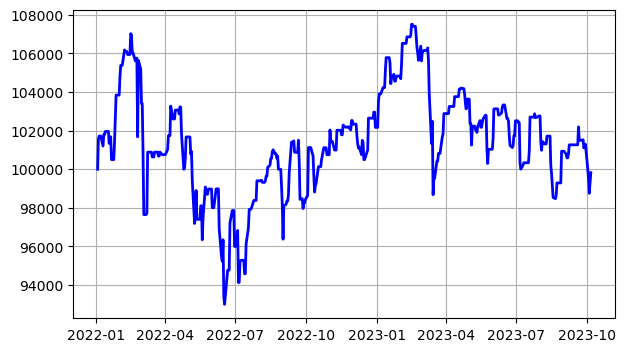

In [83]:
fig, ax = plt.subplots(1,1, figsize=(7, 4))
    

ax.plot(merged_data['Portfolio Value'], label='Portfolio Value', color='blue', linewidth=2)
ax.grid(True)

plt.savefig('Model 1 portfolio value')    
plt.show()


In [84]:
forecasted_return = forecast_df_FTSE_2['mean_forecast']
merged_data = pd.DataFrame({
    'FTSE100_price': FTSE100,
    'forecasted_return': forecasted_return
}).dropna()

merged_data

,FTSE100_price,forecasted_return
DATE,,
2022-01-03,7384.500000,0.000128
2022-01-04,7505.200195,0.000128
2022-01-05,7516.899902,0.000128
2022-01-06,7450.399902,0.000128
2022-01-07,7485.299805,0.000128
...,...,...
2023-10-02,7510.700195,0.000128
2023-10-03,7470.200195,0.000128
2023-10-04,7412.500000,0.000128


In [85]:
cash_balance = 100000  
holdings = 0           
cash_balances = []    
share_holdings = []    
holding_values = []   
portfolio_values = []

for i in range(len(merged_data)):
    price_today = merged_data.iloc[i]['FTSE100_price']
    
    if i < len(merged_data) - 1:
        forecast = merged_data.iloc[i + 1]['forecasted_return']
    else:
        forecast = 0  

    if i > 0:
        holdings = share_holdings[-1]

    if forecast > 0 and cash_balance > price_today:
        holdings = cash_balance // price_today  
        cash_balance -= holdings * price_today  
    elif forecast < 0 and holdings > 0:
        cash_balance += holdings * price_today  
        holdings = 0  

    holding_value = holdings * price_today  
    portfolio_value = cash_balance + holding_value  

    cash_balances.append(cash_balance)
    share_holdings.append(holdings)
    holding_values.append(holding_value)
    portfolio_values.append(portfolio_value)

merged_data['Cash Balance'] = cash_balances
merged_data['Share Holdings'] = share_holdings
merged_data['Holding Value'] = holding_values
merged_data['Portfolio Value'] = portfolio_values

merged_data


,FTSE100_price,forecasted_return,Cash Balance,Share Holdings,Holding Value,Portfolio Value
DATE,,,,,,
2022-01-03,7384.500000,0.000128,4001.5,13.0,95998.500000,100000.000000
2022-01-04,7505.200195,0.000128,4001.5,13.0,97567.602535,101569.102535
2022-01-05,7516.899902,0.000128,4001.5,13.0,97719.698726,101721.198726
2022-01-06,7450.399902,0.000128,4001.5,13.0,96855.198726,100856.698726
2022-01-07,7485.299805,0.000128,4001.5,13.0,97308.897465,101310.397465
...,...,...,...,...,...,...
2023-10-02,7510.700195,0.000128,4001.5,13.0,97639.102535,101640.602535
2023-10-03,7470.200195,0.000128,4001.5,13.0,97112.602535,101114.102535
2023-10-04,7412.500000,0.000128,4001.5,13.0,96362.500000,100364.000000


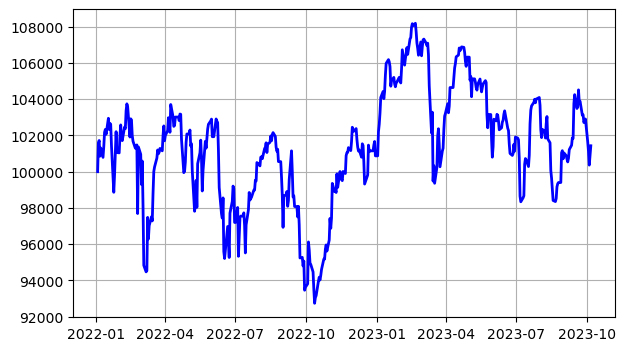

In [86]:
fig, ax = plt.subplots(1,1, figsize=(7, 4))
    

ax.plot(merged_data['Portfolio Value'], label='Portfolio Value', color='blue', linewidth=2)
ax.grid(True)

plt.savefig('Model 2 portfolio value.png')    
plt.show()


### Question 2

In [3]:
data = pd.read_csv('StockIndexFXDATA.csv')
data['DATE'] = pd.to_datetime(data['DATE'], format='%d/%m/%Y')
data.set_index('DATE', inplace=True)
data.head()

,YYYY,MM,DD,DAX30,DJ30,NIKKEI225,FTSE100,CAC40,EUROSTOXX50,SP500,SMI,VIX,USD_EUR,GBP_EUR,CHF_USD,USD_GBP
DATE,,,,,,,,,,,,,,,,
1990-01-02,1990,1,2,1814.38,2810.15,38915.87,2434.1,1988.85,1101.34,359.69,1778.1,17.24,1.27096,0.78844,1.5835,1.6120
1990-01-03,1990,1,3,1869.66,2809.73,38915.87,2463.7,1979.89,1112.82,358.76,1824.0,18.19,1.26248,0.78415,1.5795,1.6100
1990-01-04,1990,1,4,1835.88,2796.08,38712.88,2451.6,2006.42,1113.02,355.67,1824.5,19.22,1.28903,0.79082,1.5370,1.6300
1990-01-05,1990,1,5,1820.00,2773.25,38274.76,2444.5,1994.36,1099.52,352.20,1801.8,20.11,1.29054,0.78787,1.5390,1.6380
1990-01-08,1990,1,8,1843.24,2794.37,38294.96,2431.3,1968.95,1104.62,353.79,1800.3,20.26,1.29994,0.78618,1.5240,1.6535


In [4]:
indices = ['SP500', 'EUROSTOXX50', 'FTSE100', 'DAX30']
data = data[indices]
data.head()

,SP500,EUROSTOXX50,FTSE100,DAX30
DATE,,,,
1990-01-02,359.69,1101.34,2434.1,1814.38
1990-01-03,358.76,1112.82,2463.7,1869.66
1990-01-04,355.67,1113.02,2451.6,1835.88
1990-01-05,352.20,1099.52,2444.5,1820.00
1990-01-08,353.79,1104.62,2431.3,1843.24


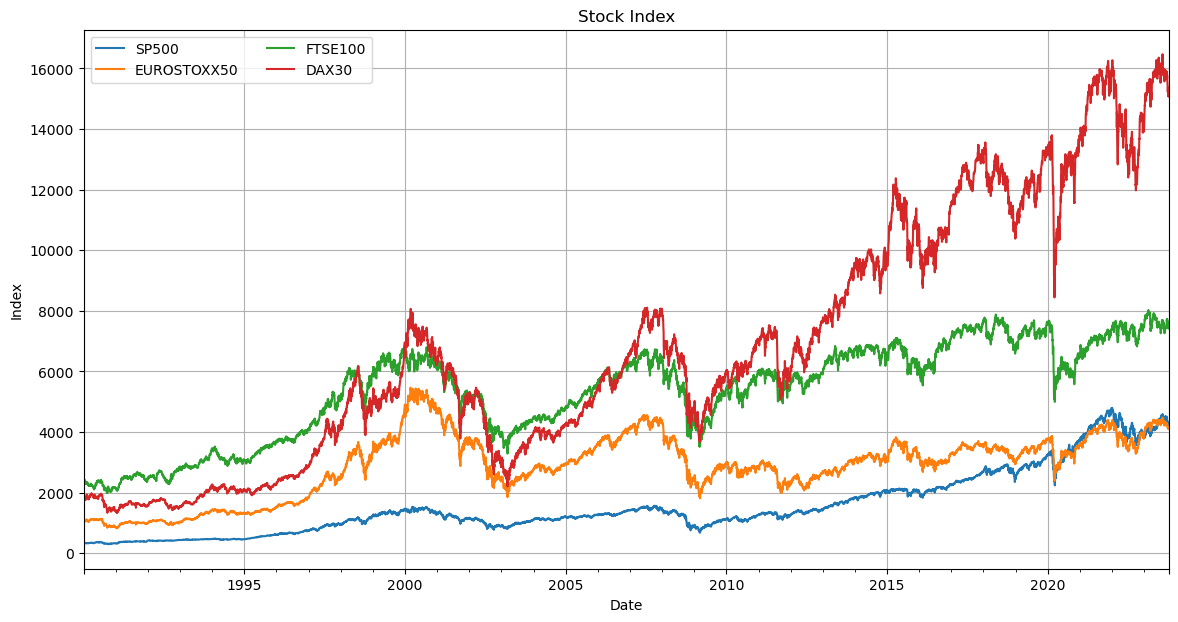

In [5]:
data.plot(figsize=(14, 7))  # Set the figure size 
plt.title('Stock Index')  # Add a title to the plot
plt.xlabel('Date')  # Label the x-axis as 'Date'
plt.ylabel('Index')  # Label the y-axis as 'Yield'
plt.legend(ncol=2)  # Display the legend in 2 columns to better manage space
plt.grid(True)  # Enable grid lines
plt.show()

In [90]:
descriptive_stats = data.describe()
median = data.median()
skewness = data.skew() 
kurtosis = data.kurtosis() + 3 

descriptive_stats.loc['Median'] = median
descriptive_stats.loc['Skewness'] = skewness
descriptive_stats.loc['Kurtosis'] = kurtosis

from scipy.stats import jarque_bera
jb_stat, jb_pvalue = jarque_bera(data) 

descriptive_stats.loc['Jarque-Bera'] = jb_stat
descriptive_stats.loc['JB pvalue'] = jb_pvalue

descriptive_stats

,SP500,EUROSTOXX50,FTSE100,DAX30
count,8809.000000,8809.000000,8809.000000,8809.000000
mean,1565.374711,2879.153863,5369.328667,6807.835666
std,1066.325764,1052.663038,1567.905437,4109.328310
min,295.460000,818.500000,1990.200000,1322.680000
25%,893.580000,2284.669000,4197.500000,3547.840000
50%,1265.420000,3007.510000,5755.300000,5952.920000
75%,2033.110000,3593.762000,6572.330000,9915.560000
max,4796.560059,5464.430000,8014.299805,16469.750000
Median,1265.420000,3007.510000,5755.300000,5952.920000
Skewness,1.249449,-0.239832,-0.481288,0.584777


In [91]:
def adf_test(series, name):
    print(f'Performing ADF Test on {name}')
    result = adfuller(series.dropna(), maxlag=20)  
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print(f'\t{key}: {value}')
    
    print()

from statsmodels.tsa.stattools import adfuller
for clo in indices:
    series = data[clo]
    adf_test(series, clo)
    

Performing ADF Test on SP500
ADF Statistic: 0.750935
p-value: 0.990801
Critical Values:
	1%: -3.431093911070841
	5%: -2.861868759471996
	10%: -2.5669449936834594

Performing ADF Test on EUROSTOXX50
ADF Statistic: -1.813576
p-value: 0.373743
Critical Values:
	1%: -3.4310931502035724
	5%: -2.8618684232610603
	10%: -2.5669448147162024

Performing ADF Test on FTSE100
ADF Statistic: -1.794399
p-value: 0.383246
Critical Values:
	1%: -3.4310942497344024
	5%: -2.8618689091201364
	10%: -2.566945073342138

Performing ADF Test on DAX30
ADF Statistic: -0.496478
p-value: 0.892702
Critical Values:
	1%: -3.4310934036530005
	5%: -2.861868535254939
	10%: -2.5669448743312677



In [92]:
Grp = data[indices].dropna()

def johansen_test(dat, det_order=0, k_ar_diff=1, signif=0.05):
    # Perform the Johansen Cointegration test using specified parameters
    # 'det_order' refers to deterministic terms: 0 = no deterministic term, -1 = constant term, 1 = linear trend
    # 'k_ar_diff' specifies the number of lags minus one (the lag order)
    result = coint_johansen(dat, det_order, k_ar_diff)
    
    # Trace Statistics
    trace_df = pd.DataFrame()  # Initialize a DataFrame to hold Trace test results
    # Generate the hypothesis test descriptions for the number of cointegrating equations (CEs)
    trace_df['No. of CE(s)'] = ['None'] + ['At most ' + str(x) for x in range(1, len(dat.columns))]
    trace_df['Eigenvalue'] = result.eig  # Eigenvalues from the Johansen test
    trace_df['Trace Stat'] = result.trace_stat  # Trace statistics (or likelihood ratio stats)
    signifvec = np.array([0.1, 0.05, 0.01])  # Pre-defined significance levels
    # Select the critical values that match the user-specified significance level
    trace_df[str(signif) + ' Crit Value'] = result.trace_stat_crit_vals[:, signifvec == signif]
    
    # Max-Eigen Statistics
    maxeig_df = pd.DataFrame()  # Initialize a DataFrame to hold Max-Eigen test results
    maxeig_df['No. of CE(s)'] = trace_df['No. of CE(s)']  # Same hypothesis test descriptions as for Trace test
    maxeig_df['Eigenvalue'] = trace_df['Eigenvalue']  # Eigenvalues from the Johansen test
    maxeig_df['Max-Eigen Stat'] = result.max_eig_stat  # Maximum eigenvalue statistics
    # Select the critical values that match the user-specified significance level for Max-Eigen test
    maxeig_df[str(signif) + ' Crit Value'] = result.max_eig_stat_crit_vals[:, signifvec == signif]
    
    # Output the results
    print("Johansen's Cointegration Trace test")
    print(trace_df) 
    print("Johansen's Cointegration Max-Eigen test")
    print(maxeig_df) 
    
johansen_test(Grp)

Johansen's Cointegration Trace test
  No. of CE(s)  Eigenvalue  Trace Stat  0.05 Crit Value
0         None    0.004389   55.247097          47.8545
1    At most 1    0.001287   16.509898          29.7961
2    At most 2    0.000573    5.165572          15.4943
3    At most 3    0.000014    0.120760           3.8415
Johansen's Cointegration Max-Eigen test
  No. of CE(s)  Eigenvalue  Max-Eigen Stat  0.05 Crit Value
0         None    0.004389       38.737199          27.5858
1    At most 1    0.001287       11.344326          21.1314
2    At most 2    0.000573        5.044811          14.2639
3    At most 3    0.000014        0.120760           3.8415


In [93]:
lag_selection = select_order(Grp, maxlags=5, deterministic='ci')

# Output a summary of the lag order selection results
lag_selection.summary()

,AIC,BIC,FPE,HQIC
0,27.73,27.75,1.101e+12,27.73
1,27.61,27.65*,9.823e+11,27.62
2,27.60,27.65,9.702e+11,27.62
3,27.59,27.65,9.619e+11,27.61*
4,27.59,27.66,9.601e+11,27.61
5,27.59*,27.67,9.597e+11*,27.62


In [94]:
lag_selection.selected_orders

{'aic': 5, 'bic': 1, 'hqic': 3, 'fpe': 5}

In [95]:
from statsmodels.tsa.vector_ar.vecm import VECM

model = VECM(Grp, k_ar_diff=2, coint_rank=1, deterministic='ci')


vecm_result = model.fit()


print("VECM Summary:")
print(vecm_result.summary())

VECM Summary:
Det. terms outside the coint. relation & lagged endog. parameters for equation SP500
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
L1.SP500          -0.0926      0.013     -7.142      0.000      -0.118      -0.067
L1.EUROSTOXX50     0.0214      0.014      1.556      0.120      -0.006       0.048
L1.FTSE100        -0.0145      0.007     -2.036      0.042      -0.028      -0.001
L1.DAX30           0.0012      0.005      0.234      0.815      -0.009       0.011
L2.SP500          -0.0200      0.013     -1.504      0.133      -0.046       0.006
L2.EUROSTOXX50    -0.0636      0.014     -4.625      0.000      -0.091      -0.037
L2.FTSE100         0.0040      0.007      0.559      0.576      -0.010       0.018
L2.DAX30           0.0383      0.005      7.643      0.000       0.028       0.048
Det. terms outside the coint. relation & lagged endog. parameters for e

In [96]:
vecm = VECM(data, k_ar_diff=1, coint_rank=1).fit()

# Combine residuals by summing across series
combined_residuals = vecm.resid.sum(axis=1)  # Sum residuals for each time step

# Apply Ljung-Box test on the combined residuals
lb_test = acorr_ljungbox(combined_residuals, lags=list(range(1, 11)), return_df=True)

print(lb_test)

      lb_stat     lb_pvalue
1    0.528913  4.670641e-01
2    2.135121  3.438463e-01
3   11.526690  9.193570e-03
4   11.648350  2.016708e-02
5   12.380279  2.993273e-02
6   36.513105  2.190668e-06
7   46.717840  6.335886e-08
8   53.776454  7.628071e-09
9   66.547846  7.206266e-11
10  68.322129  9.338124e-11
